# Analysis of CO2 sensors and EC Flux (reference) measurements on Clara peatland site for the period of January- December 2021

In [63]:
#import all needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import plotly.express as px

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from functools import reduce

In [64]:
#increase figures and plot resolution
plt.rcParams['figure.dpi']=300
plt.rcParams['savefig.dpi']=300

In [65]:

#2020 dataset
#load the dataset
#EC flux tower data
ec_data=pd.read_excel('Clara_EC_Flux.xlsx',  index_col='Timestamp')

#Sensors on EC tower, same as central ecotopes
#dl_1466=pd.read_csv('dl_1466.csv', parse_dates=True, index_col='Timestamp', sep=';')
dl_1826=pd.read_csv('CO2_1826.csv', parse_dates=True, index_col='Timestamp', sep=';')
dl_1827=pd.read_csv('CO2_1827.csv', parse_dates=True, index_col='Timestamp', sep=';')

#Sensors on central ecotopes
dl_1824=pd.read_csv('CO2_1824.csv', parse_dates=True, index_col='Timestamp', sep=';')
dl_1825=pd.read_csv('CO2_1825.csv', parse_dates=True, index_col='Timestamp', sep=';')

#sensors on marginal ecotopes
dl_1467=pd.read_csv('CO2_1467.csv', parse_dates=True, index_col='Timestamp', sep=';')

dl_1878=pd.read_csv('CO2_1878.csv', parse_dates=True, index_col='Timestamp', sep=';')
dl_1879=pd.read_csv('CO2_1879.csv', parse_dates=True, index_col='Timestamp', sep=';')
#dl_1828 does not have any data at the moment
dl_1826.head()

,AirHumidity,AirTemperature,BarometerTemperature,BarometricPressure,BatteryVoltage,CO2Concentration,CO2ConcentrationLPF,CO2SensorStatus,CO2SensorTemperature,CapacitorVoltage1,CapacitorVoltage2,RawIRreading,RawIRreadingLPF
Timestamp,,,,,,,,,,,,,
2021-01-08 18:13:44,90.462250,-5.657581,-6.25,102180,NaN,673,678,0,-5.74,3.026,2.968,39361,39328
2021-01-08 20:14:03,96.054596,-7.456716,-8.09,102228,NaN,1450,1433,0,-7.55,3.024,2.964,36518,36571
2021-01-09 03:33:42,96.684021,-10.331042,-11.05,102312,NaN,1434,1434,32,-8.50,3.025,2.961,36610,36610
2021-01-09 03:43:46,96.939606,-10.180891,-10.90,102306,NaN,1469,1469,32,-8.50,3.025,2.961,36505,36505
2021-01-09 03:53:48,97.218079,-9.987839,-10.70,102304,NaN,1522,1522,32,-8.50,3.025,2.962,36346,36346


# Exploratory Data Analysis

In [61]:
#Load and explore EC Flux Data
ec_data=ec_data.rename(columns={'CO2Concentration':'EC_CO2'})
ec_data.drop('DOY', axis=1, inplace=True)

ec_data.tail()

,EC_CO2
Timestamp,
2021-12-31 21:30:00,390.424
2021-12-31 22:00:00,404.006
2021-12-31 22:30:00,405.254
2021-12-31 23:00:00,405.439
2021-12-31 23:30:00,405.078


In [62]:
dl_1827.columns

Index(['AirHumidity', 'AirTemperature', 'BarometerTemperature',
       'BarometricPressure', 'BatteryVoltage', 'CO2Concentration',
       'CO2ConcentrationLPF', 'CO2SensorStatus', 'CO2SensorTemperature',
       'CapacitorVoltage1', 'CapacitorVoltage2', 'RawIRreading',
       'RawIRreadingLPF'],
      dtype='object')

In [41]:
dl_1826.shape

(13539, 13)

In [42]:
dl_1824.shape

(26818, 11)

In [43]:
dl_1825.shape

(19471, 13)

In [44]:
dl_1467.shape

(19952, 13)

In [45]:
dl_1878.shape

(22240, 13)

In [46]:
#Sensors data were sampled every 10 mins, resample to 30 minuites

#sensors mounted on ec tower (central ecotope)
dl_1826=dl_1826.resample('30Min').mean()
dl_1827=dl_1827.resample('30Min').mean()

#sensors on central ecotopes
dl_1824=dl_1824.resample('30Min').mean()
dl_1825=dl_1825.resample('30Min').mean()

#sensors on marginal ecotopes
dl_1467=dl_1467.resample('30Min').mean()

#lullymore site
dl_1878=dl_1878.resample('30Min').mean()
dl_1879=dl_1879.resample('30Min').mean()


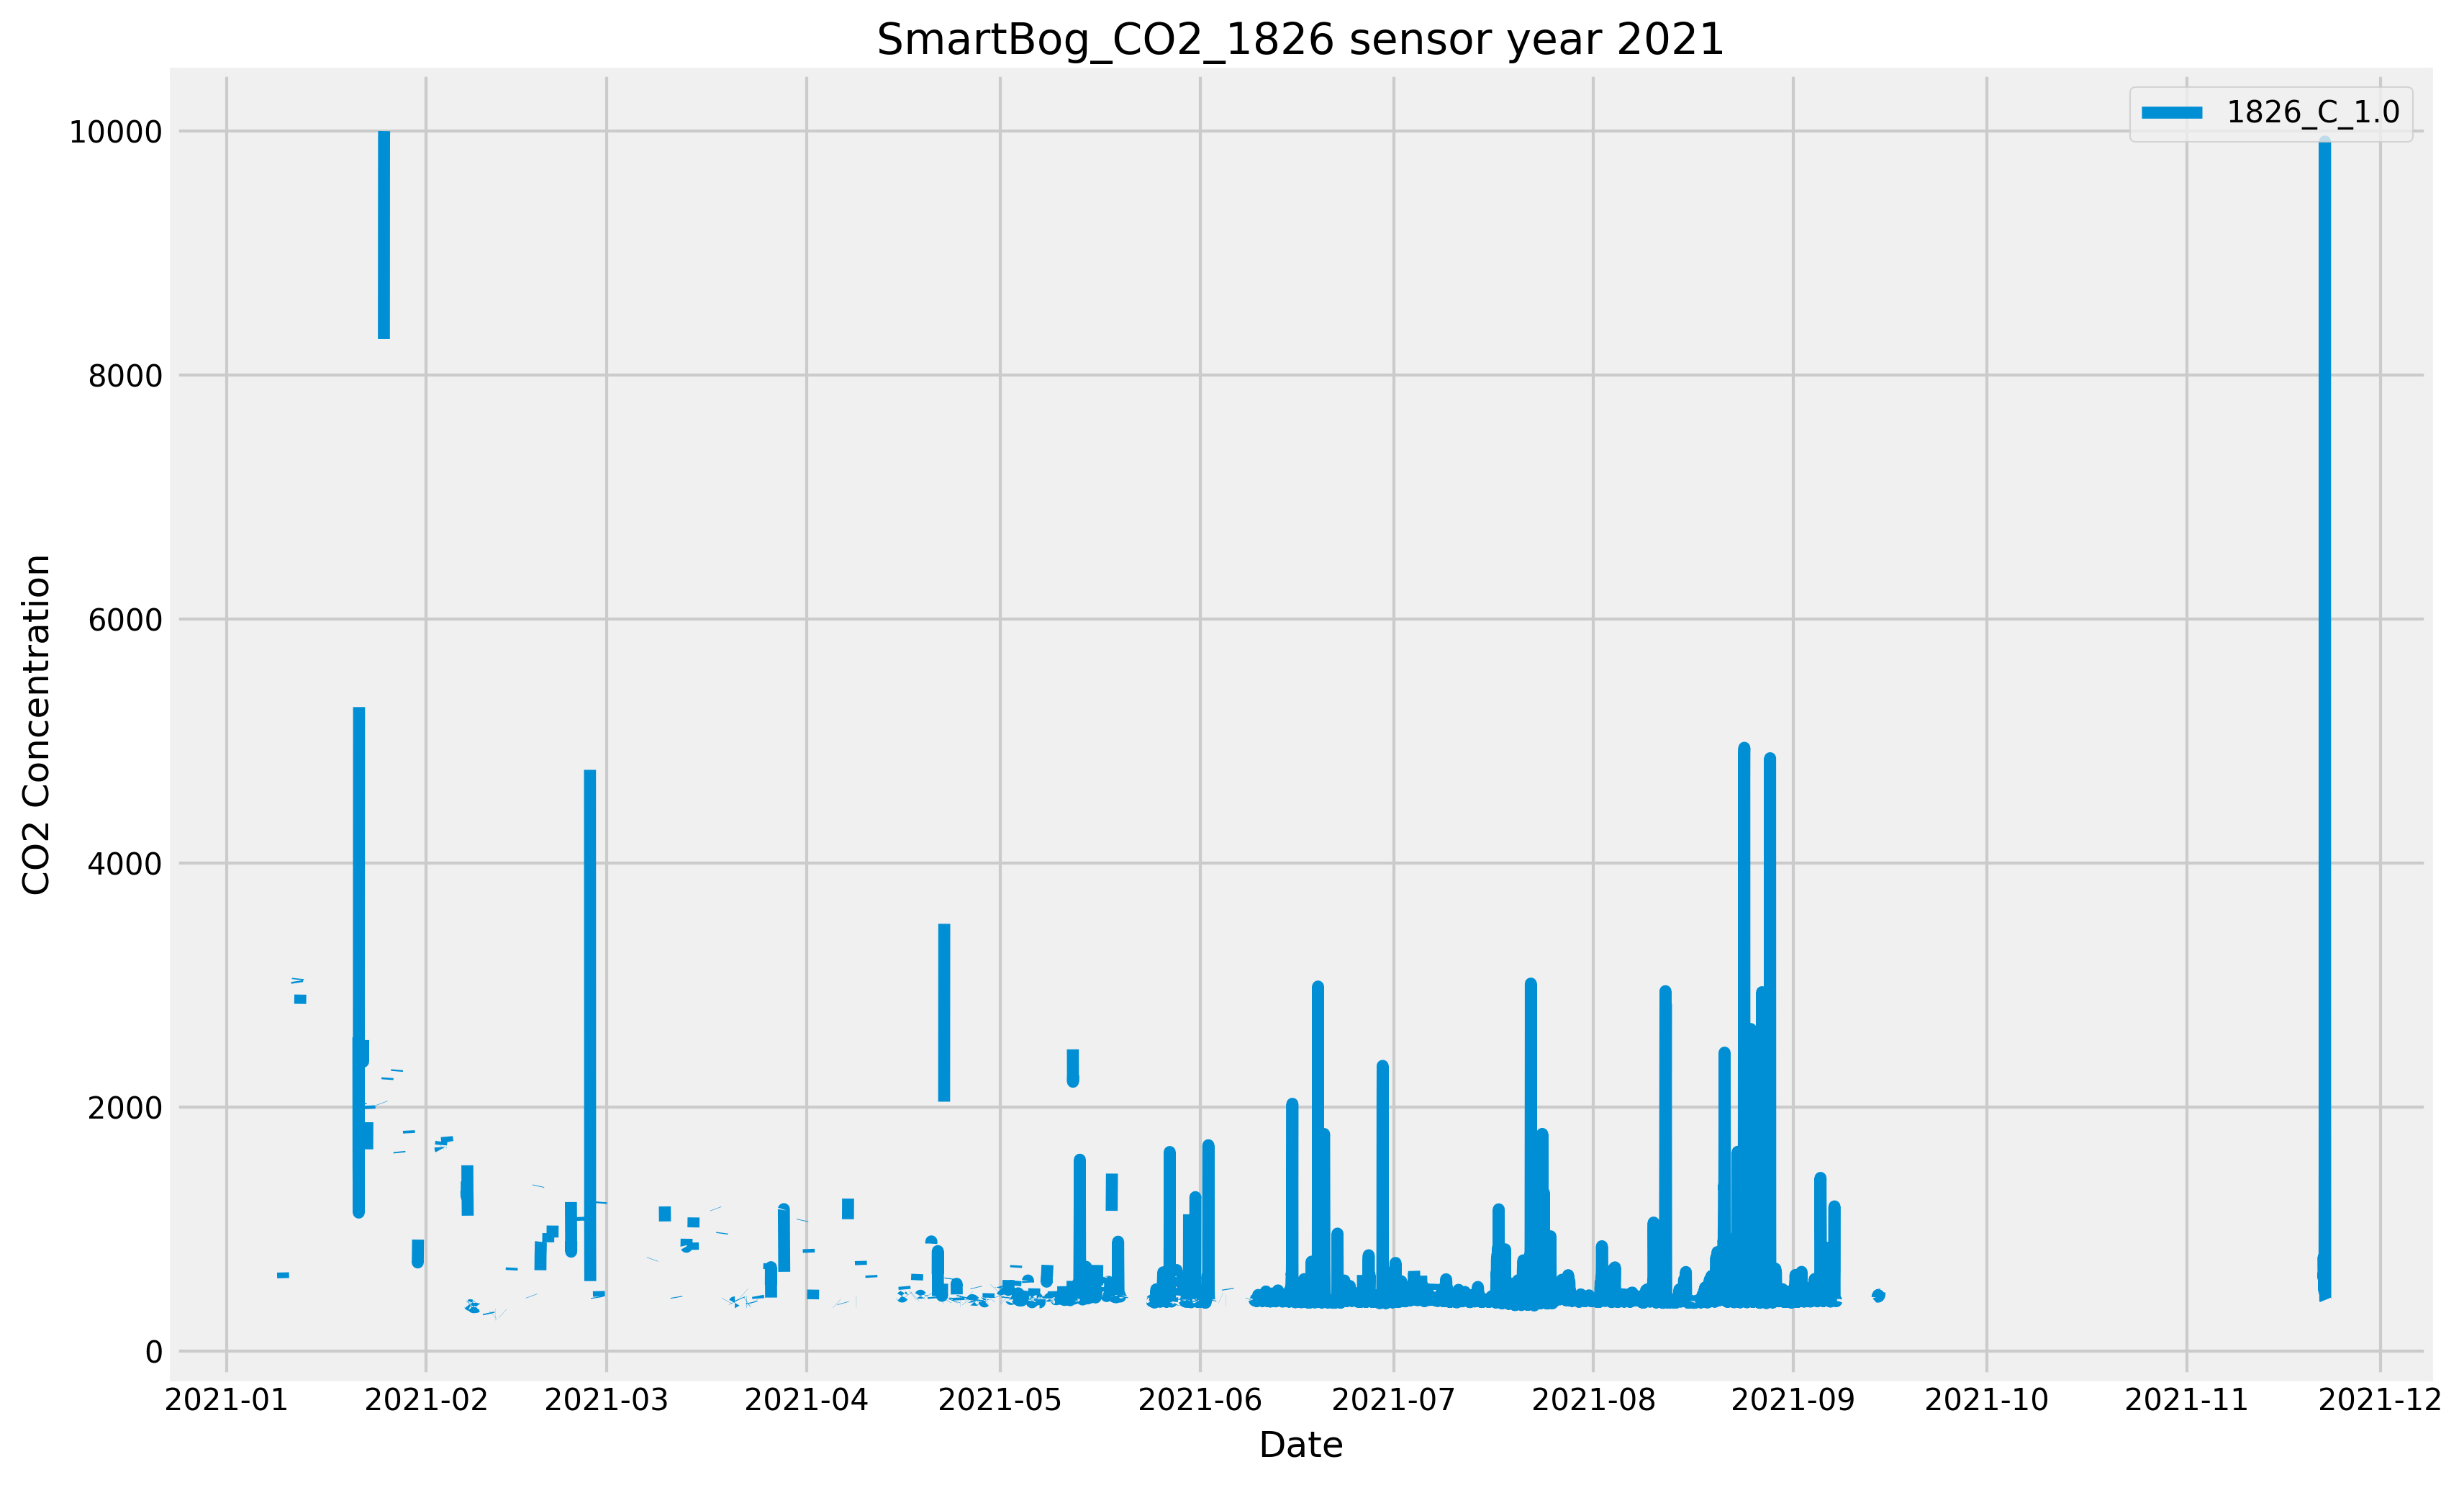

In [47]:
#compare them to ground truth data
plt.figure(figsize=(12,8))
#plt.plot(imputed_df['EC_CO2'].resample('D').mean())
plt.plot(dl_1826['CO2Concentration'])
plt.title('SmartBog_CO2_1826 sensor year 2021')
plt.legend(['1826_C_1.0'], loc='upper right')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.show()

In [48]:
# get the CO2 concentration from all sensors measurements
# First, rename the columns of the sensor to make them unique to each sensor, for easy identification and handling
dl_1826_columns={'CO2Concentration':'1826_CO2Concentration','CO2ConcentrationLPF':'1826_CO2ConcentrationLPF'}
dl_1826=dl_1826.rename(columns=dl_1826_columns)

dl_1827_columns={'CO2Concentration':'1827_CO2Concentration','CO2ConcentrationLPF':'1827_CO2ConcentrationLPF'}
dl_1827=dl_1827.rename(columns=dl_1827_columns)

dl_1824_columns={'CO2Concentration':'1824_CO2Concentration','CO2ConcentrationLPF':'1824_CO2ConcentrationLPF'}
dl_1824=dl_1824.rename(columns=dl_1824_columns)

dl_1825_columns={'CO2Concentration':'1825_CO2Concentration','CO2ConcentrationLPF':'1825_CO2ConcentrationLPF'}
dl_1825=dl_1825.rename(columns=dl_1825_columns)
                       
dl_1467_columns={'CO2Concentration':'1467_CO2Concentration','CO2ConcentrationLPF':'1467_CO2ConcentrationLPF'}
dl_1467=dl_1467.rename(columns=dl_1467_columns)

dl_1878_columns={'CO2Concentration':'1878_CO2Concentration','CO2ConcentrationLPF':'1878_CO2ConcentrationLPF'}
dl_1878=dl_1878.rename(columns=dl_1878_columns)
dl_1879_columns={'CO2Concentration':'1879_CO2Concentration','CO2ConcentrationLPF':'1879_CO2ConcentrationLPF'}
dl_1879=dl_1879.rename(columns=dl_1879_columns)

In [49]:
dl_1826=pd.DataFrame(dl_1826['1826_CO2Concentration'])
dl_1827=pd.DataFrame(dl_1827['1827_CO2Concentration'])

dl_1824=pd.DataFrame(dl_1824['1824_CO2Concentration'])
dl_1825=pd.DataFrame(dl_1825['1825_CO2Concentration'])

dl_1467=pd.DataFrame(dl_1467['1467_CO2Concentration'])

dl_1878=pd.DataFrame(dl_1878['1878_CO2Concentration'])
dl_1879=pd.DataFrame(dl_1879['1879_CO2Concentration'])

In [50]:
ec_sensors=[ec_data,  dl_1826, dl_1827, dl_1824, dl_1825,dl_1467]
lm_sensors=[ec_data, dl_1878, dl_1879]

In [51]:
ec_sensors=reduce(lambda left,right:pd.merge(left, right, on=['Timestamp'],how='inner'),ec_sensors)
ec_sensors.to_csv('Smartbog_CO2.csv')
ec_sensors.head()

,EC_CO2,1826_CO2Concentration,1827_CO2Concentration,1824_CO2Concentration,1825_CO2Concentration,1467_CO2Concentration
Timestamp,,,,,,
2021-01-08 19:30:00,410.104,NaN,374.5,NaN,NaN,372.000000
2021-01-08 20:00:00,413.546,1450.0,NaN,NaN,NaN,380.000000
2021-01-08 20:30:00,413.899,NaN,430.0,488.5,NaN,451.333333
2021-01-08 21:00:00,414.792,NaN,NaN,448.0,NaN,NaN
2021-01-08 21:30:00,412.043,NaN,433.0,NaN,NaN,416.500000


In [56]:
ec_sensors.tail()

,EC_CO2,1826_CO2Concentration,1827_CO2Concentration,1824_CO2Concentration,1825_CO2Concentration,1467_CO2Concentration
Timestamp,,,,,,
2021-10-27 17:30:00,NaN,NaN,NaN,442.000000,NaN,NaN
2021-10-27 18:00:00,NaN,NaN,NaN,449.000000,NaN,NaN
2021-10-27 18:30:00,NaN,NaN,NaN,454.000000,NaN,NaN
2021-10-27 19:00:00,NaN,NaN,NaN,469.666667,NaN,NaN
2021-10-27 19:30:00,NaN,NaN,NaN,475.000000,NaN,NaN


In [53]:
lm_sensors=reduce(lambda left,right:pd.merge(left, right, on=['Timestamp'],how='inner'),lm_sensors)
lm_sensors.to_csv('lm_CO2.csv')
lm_sensors.shape

(12558, 3)

In [55]:
lm_sensors.tail()

,EC_CO2,1878_CO2Concentration,1879_CO2Concentration
Timestamp,,,
2021-12-31 13:30:00,399.081,407.666667,428.333333
2021-12-31 14:00:00,399.481,407.333333,427.333333
2021-12-31 14:30:00,399.029,408.333333,428.666667
2021-12-31 15:00:00,399.650,409.333333,427.333333
2021-12-31 15:30:00,400.487,411.000000,431.333333


In [17]:
ec_sensors=reduce(lambda left,right:pd.merge(left, right, on=['Timestamp'],how='outer'),ec_sensors)

lm_sensors=reduce(lambda left,right:pd.merge(left, right, on=['Timestamp'],how='outer'),lm_sensors)

In [18]:
ec_sensors.head()

,EC_CO2,1826_CO2Concentration,1827_CO2Concentration,1824_CO2Concentration,1825_CO2Concentration,1467_CO2Concentration
Timestamp,,,,,,
2021-01-01 00:30:00,404.233,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,404.480,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:30:00,405.039,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,404.871,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:30:00,404.892,NaN,NaN,NaN,NaN,NaN


In [52]:
ec_sensors.isnull().sum()

EC_CO2                    329
1826_CO2Concentration    8389
1827_CO2Concentration    6736
1824_CO2Concentration    3760
1825_CO2Concentration    6646
1467_CO2Concentration    6396
dtype: int64

ec_sensors=ec_sensors_merged[(ec_sensors_merged.index >='2020-07-01') & (ec_sensors_merged.index <='2020-12-31')]

In [20]:
#Impute the missing values using MICE 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = ec_sensors.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(ec_sensors)
imputed_df=pd.DataFrame(MiceImputed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [21]:
#lullymore site
#Impute the missing values using MICE 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = lm_sensors.copy(deep=True)
mice_imputer_lm = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer_lm.fit_transform(lm_sensors)
imputed_df_lm=pd.DataFrame(MiceImputed)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [22]:
ec_sensors=ec_sensors.rename(columns={'1826_CO2Concentration':'CL_EC_0.5', '1827_CO2Concentration':'CL_EC_1.0',
           '1824_CO2Concentration':'CL_C_1.0', '1825_CO2Concentration':'CL_C_0.5','1467_CO2Concentration':'CL_M_1.0'})
ec_sensors.head()

,EC_CO2,CL_EC_0.5,CL_EC_1.0,CL_C_1.0,CL_C_0.5,CL_M_1.0
Timestamp,,,,,,
2021-01-01 00:30:00,404.233,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,404.480,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:30:00,405.039,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,404.871,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:30:00,404.892,NaN,NaN,NaN,NaN,NaN


In [23]:
corr=ec_sensors.corr(method='pearson')
corr

,EC_CO2,CL_EC_0.5,CL_EC_1.0,CL_C_1.0,CL_C_0.5,CL_M_1.0
EC_CO2,1.000000,0.138732,0.157587,0.194589,0.163373,0.170919
CL_EC_0.5,0.138732,1.000000,0.890422,0.342492,0.612625,0.701454
CL_EC_1.0,0.157587,0.890422,1.000000,0.294510,0.584331,0.646283
CL_C_1.0,0.194589,0.342492,0.294510,1.000000,0.332577,0.458430
CL_C_0.5,0.163373,0.612625,0.584331,0.332577,1.000000,0.823502
CL_M_1.0,0.170919,0.701454,0.646283,0.458430,0.823502,1.000000


<AxesSubplot:>

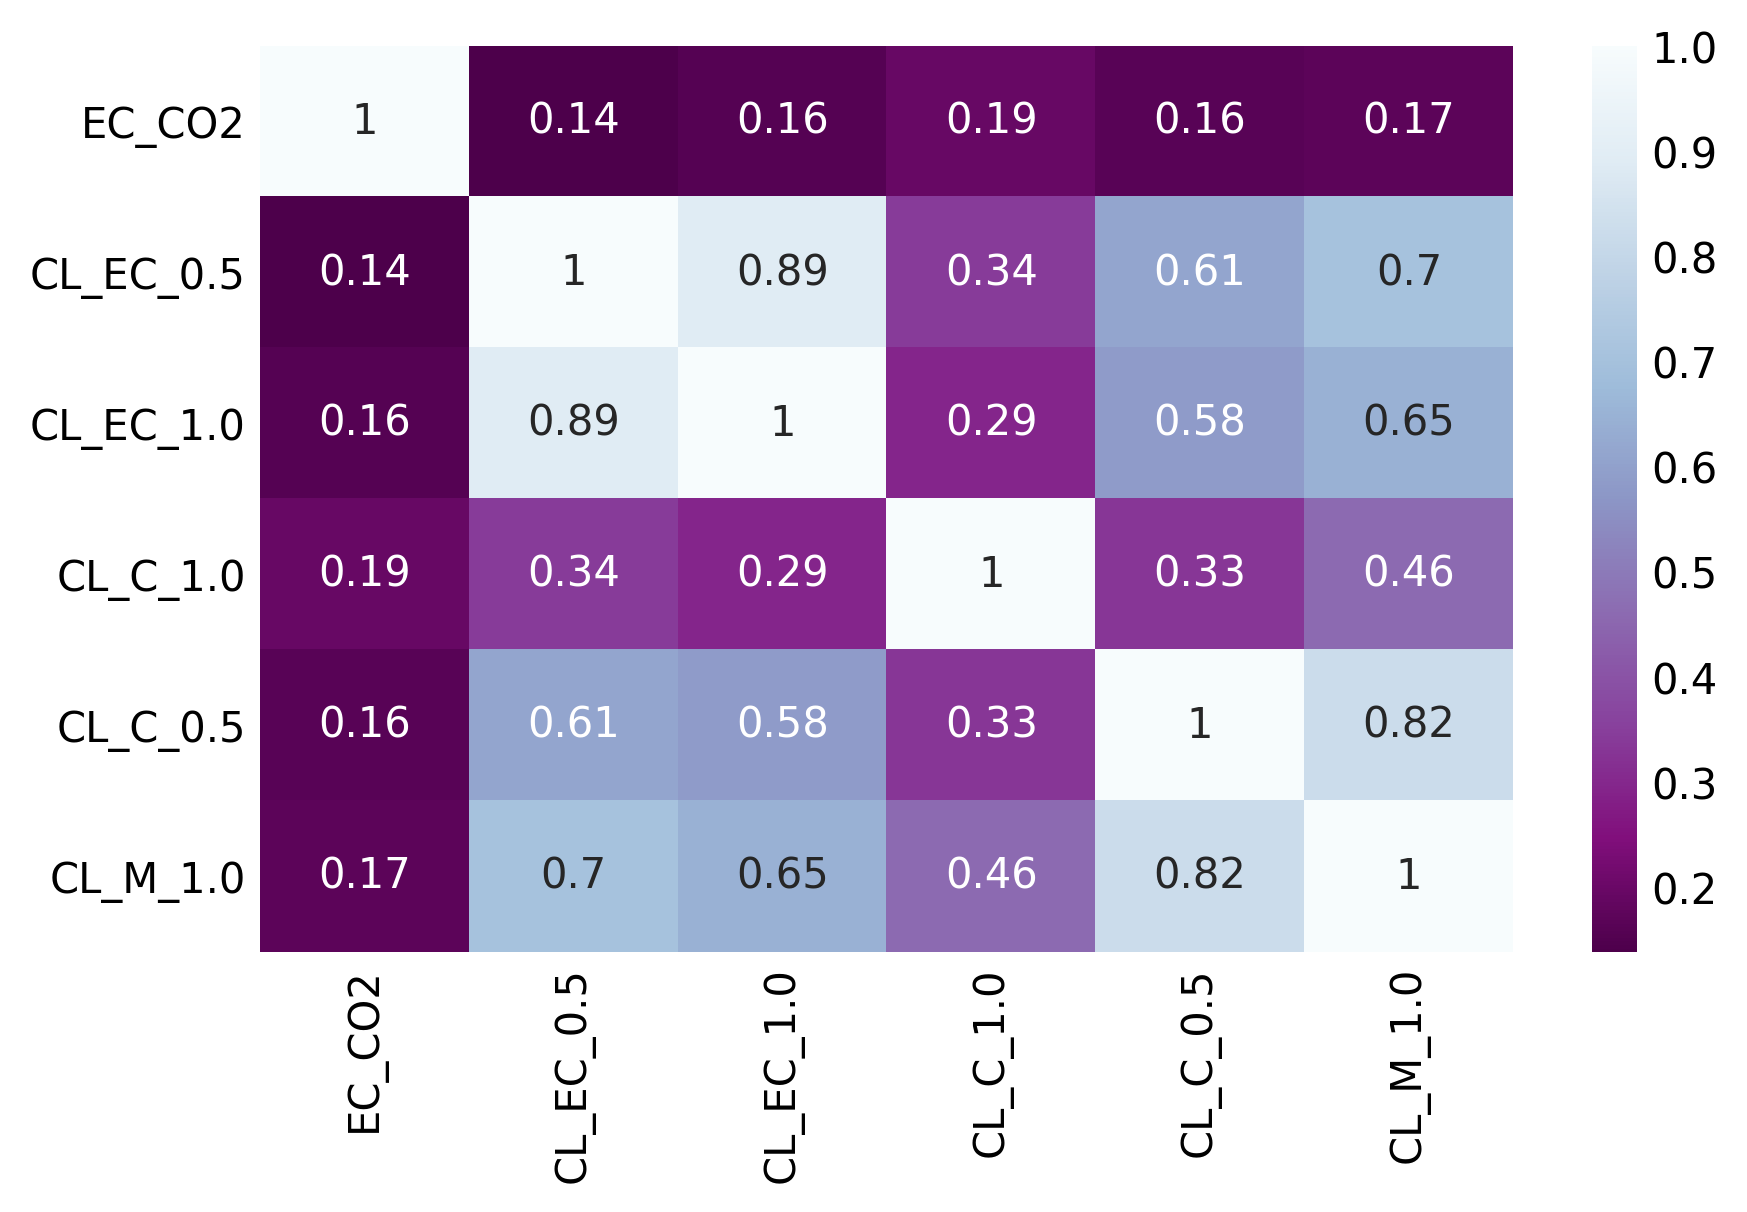

In [24]:
import seaborn as sns
sns.heatmap(corr,cmap='BuPu_r', annot=True )

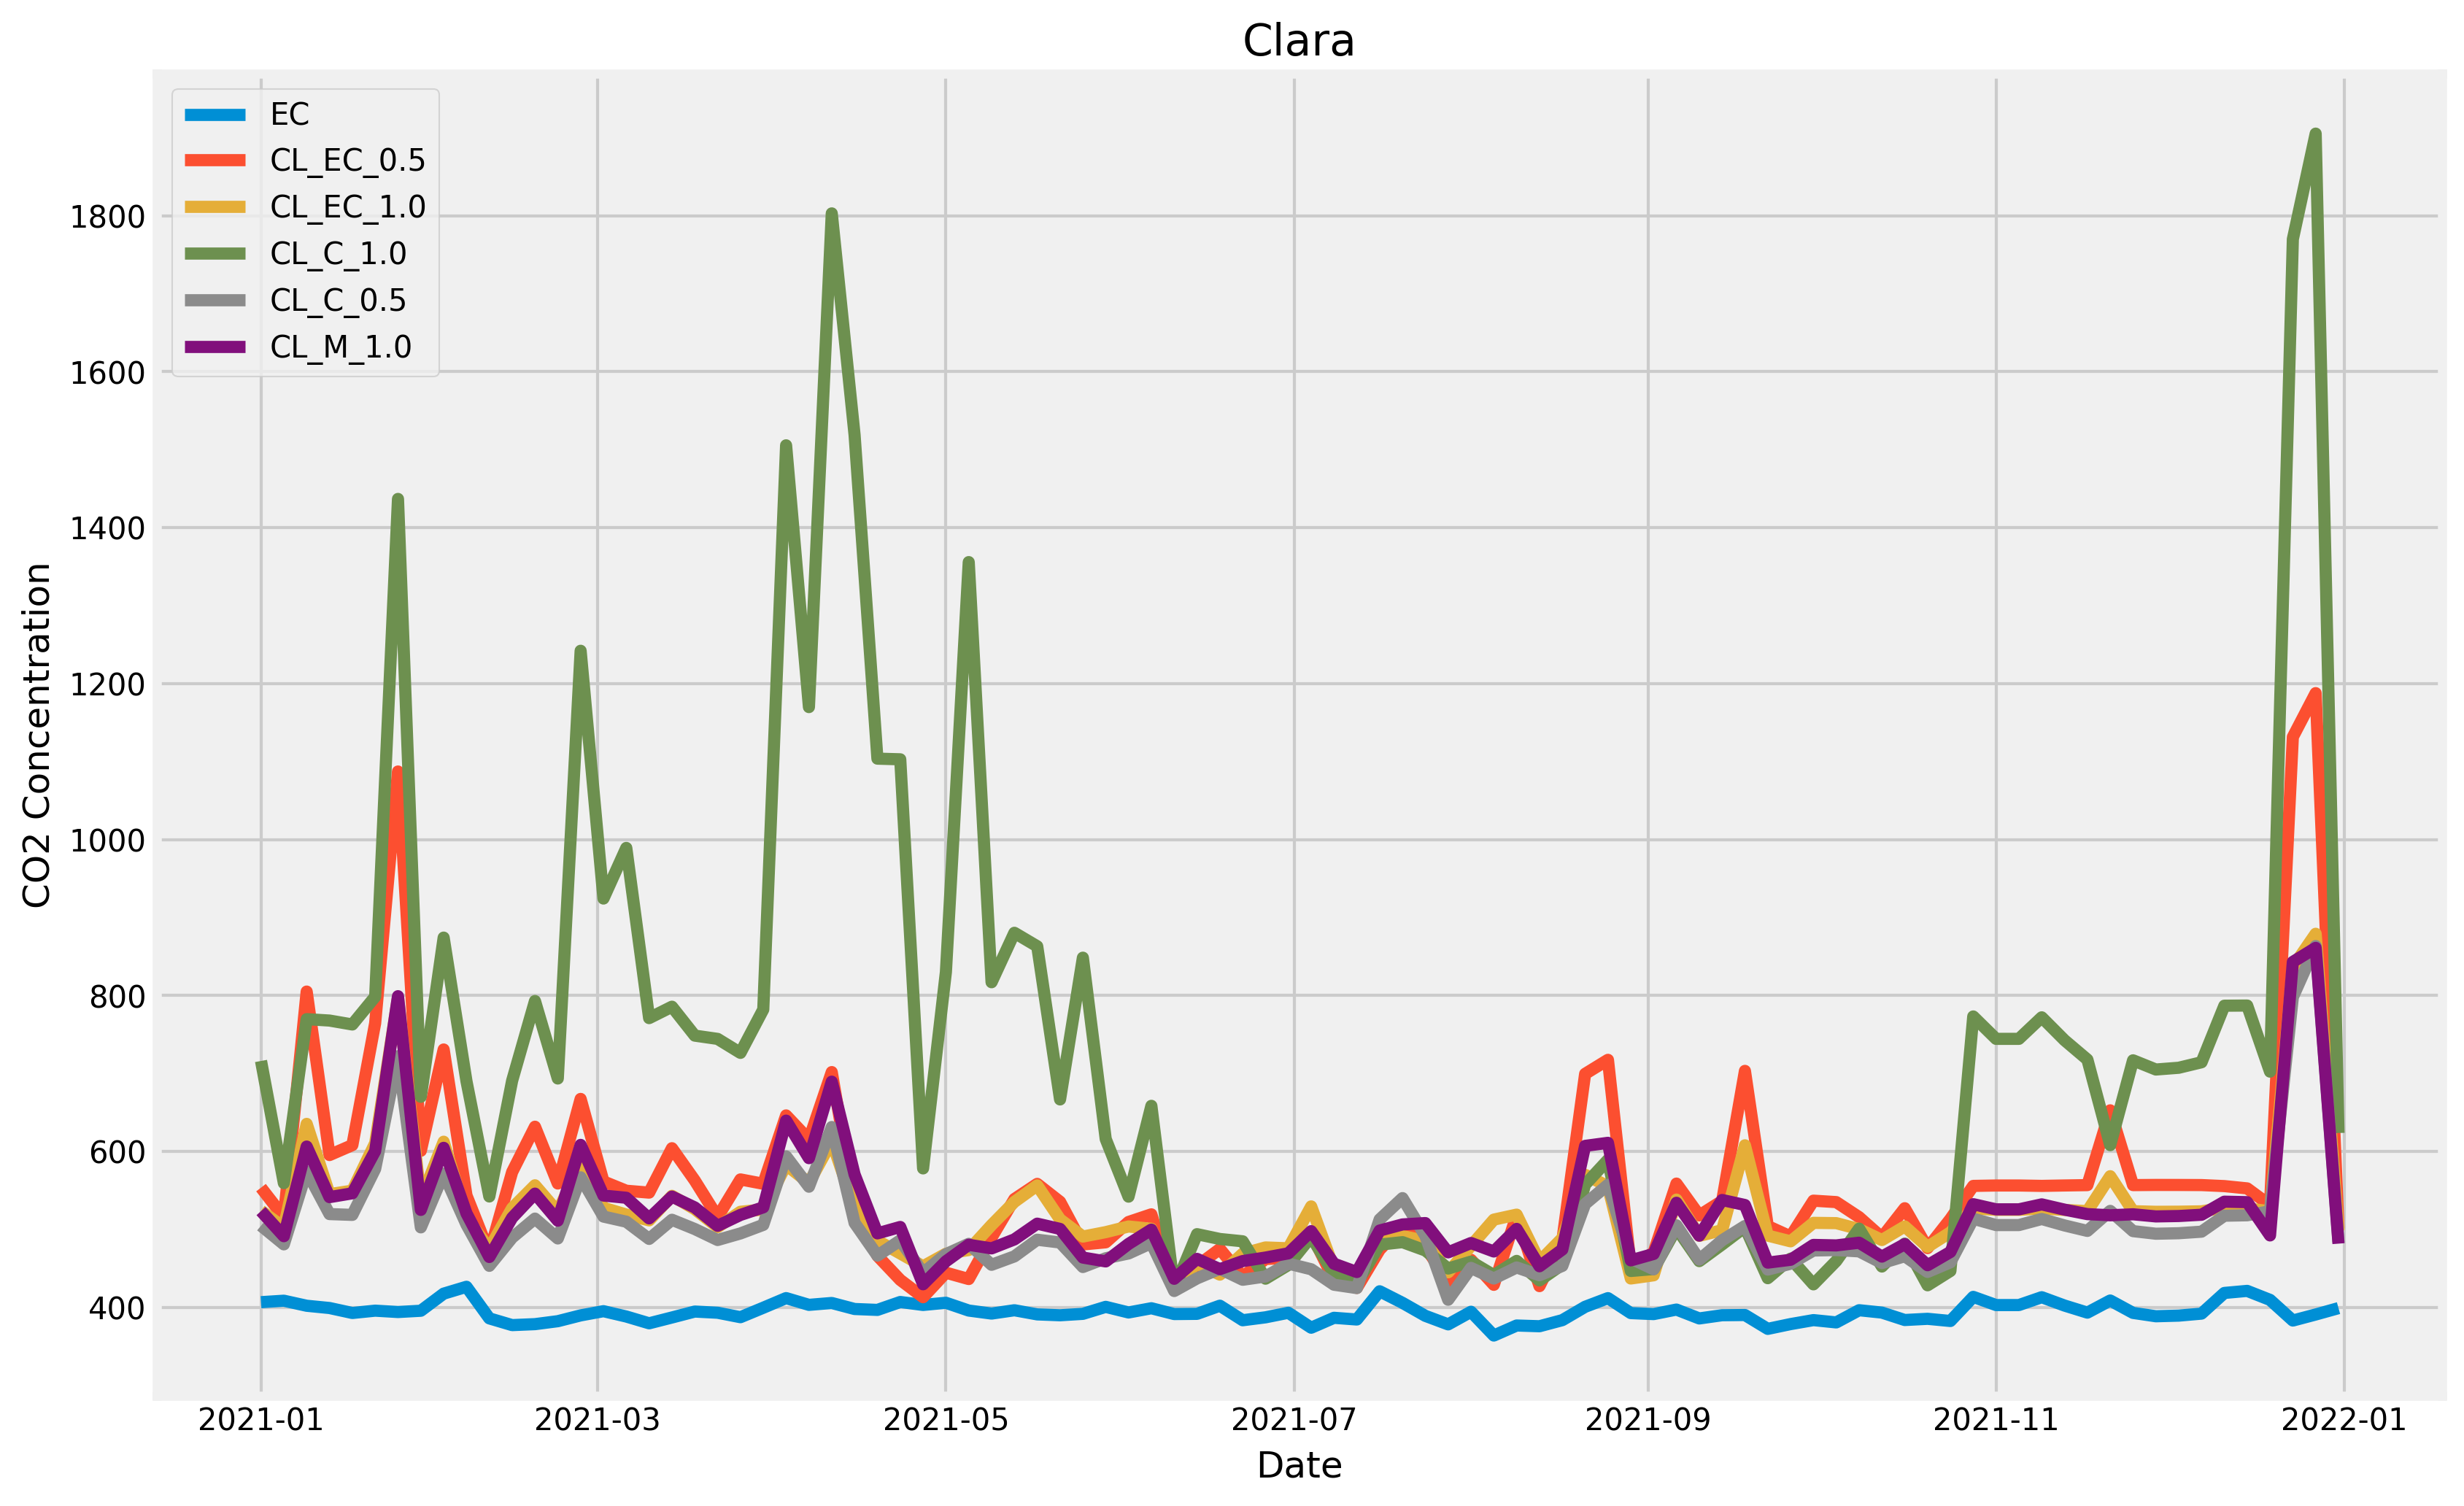

In [25]:
#compare them to ground truth data
plt.figure(figsize=(12,8))
plt.plot(imputed_df['EC_CO2'].resample('4D').mean())

plt.plot(imputed_df['1826_CO2Concentration'].resample('4D').mean())
plt.plot(imputed_df['1827_CO2Concentration'].resample('4D').mean())

plt.plot(imputed_df['1824_CO2Concentration'].resample('4D').mean())
plt.plot(imputed_df['1825_CO2Concentration'].resample('4D').mean())

plt.plot(imputed_df['1467_CO2Concentration'].resample('4D').mean())
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')

#plt.legend(['CL_C_1.0', 'CL_M_1.0'], loc='upper left')
plt.title('Clara')

plt.legend(['EC','CL_EC_0.5', 'CL_EC_1.0',
           'CL_C_1.0', 'CL_C_0.5','CL_M_1.0'], loc='upper left')
plt.show()

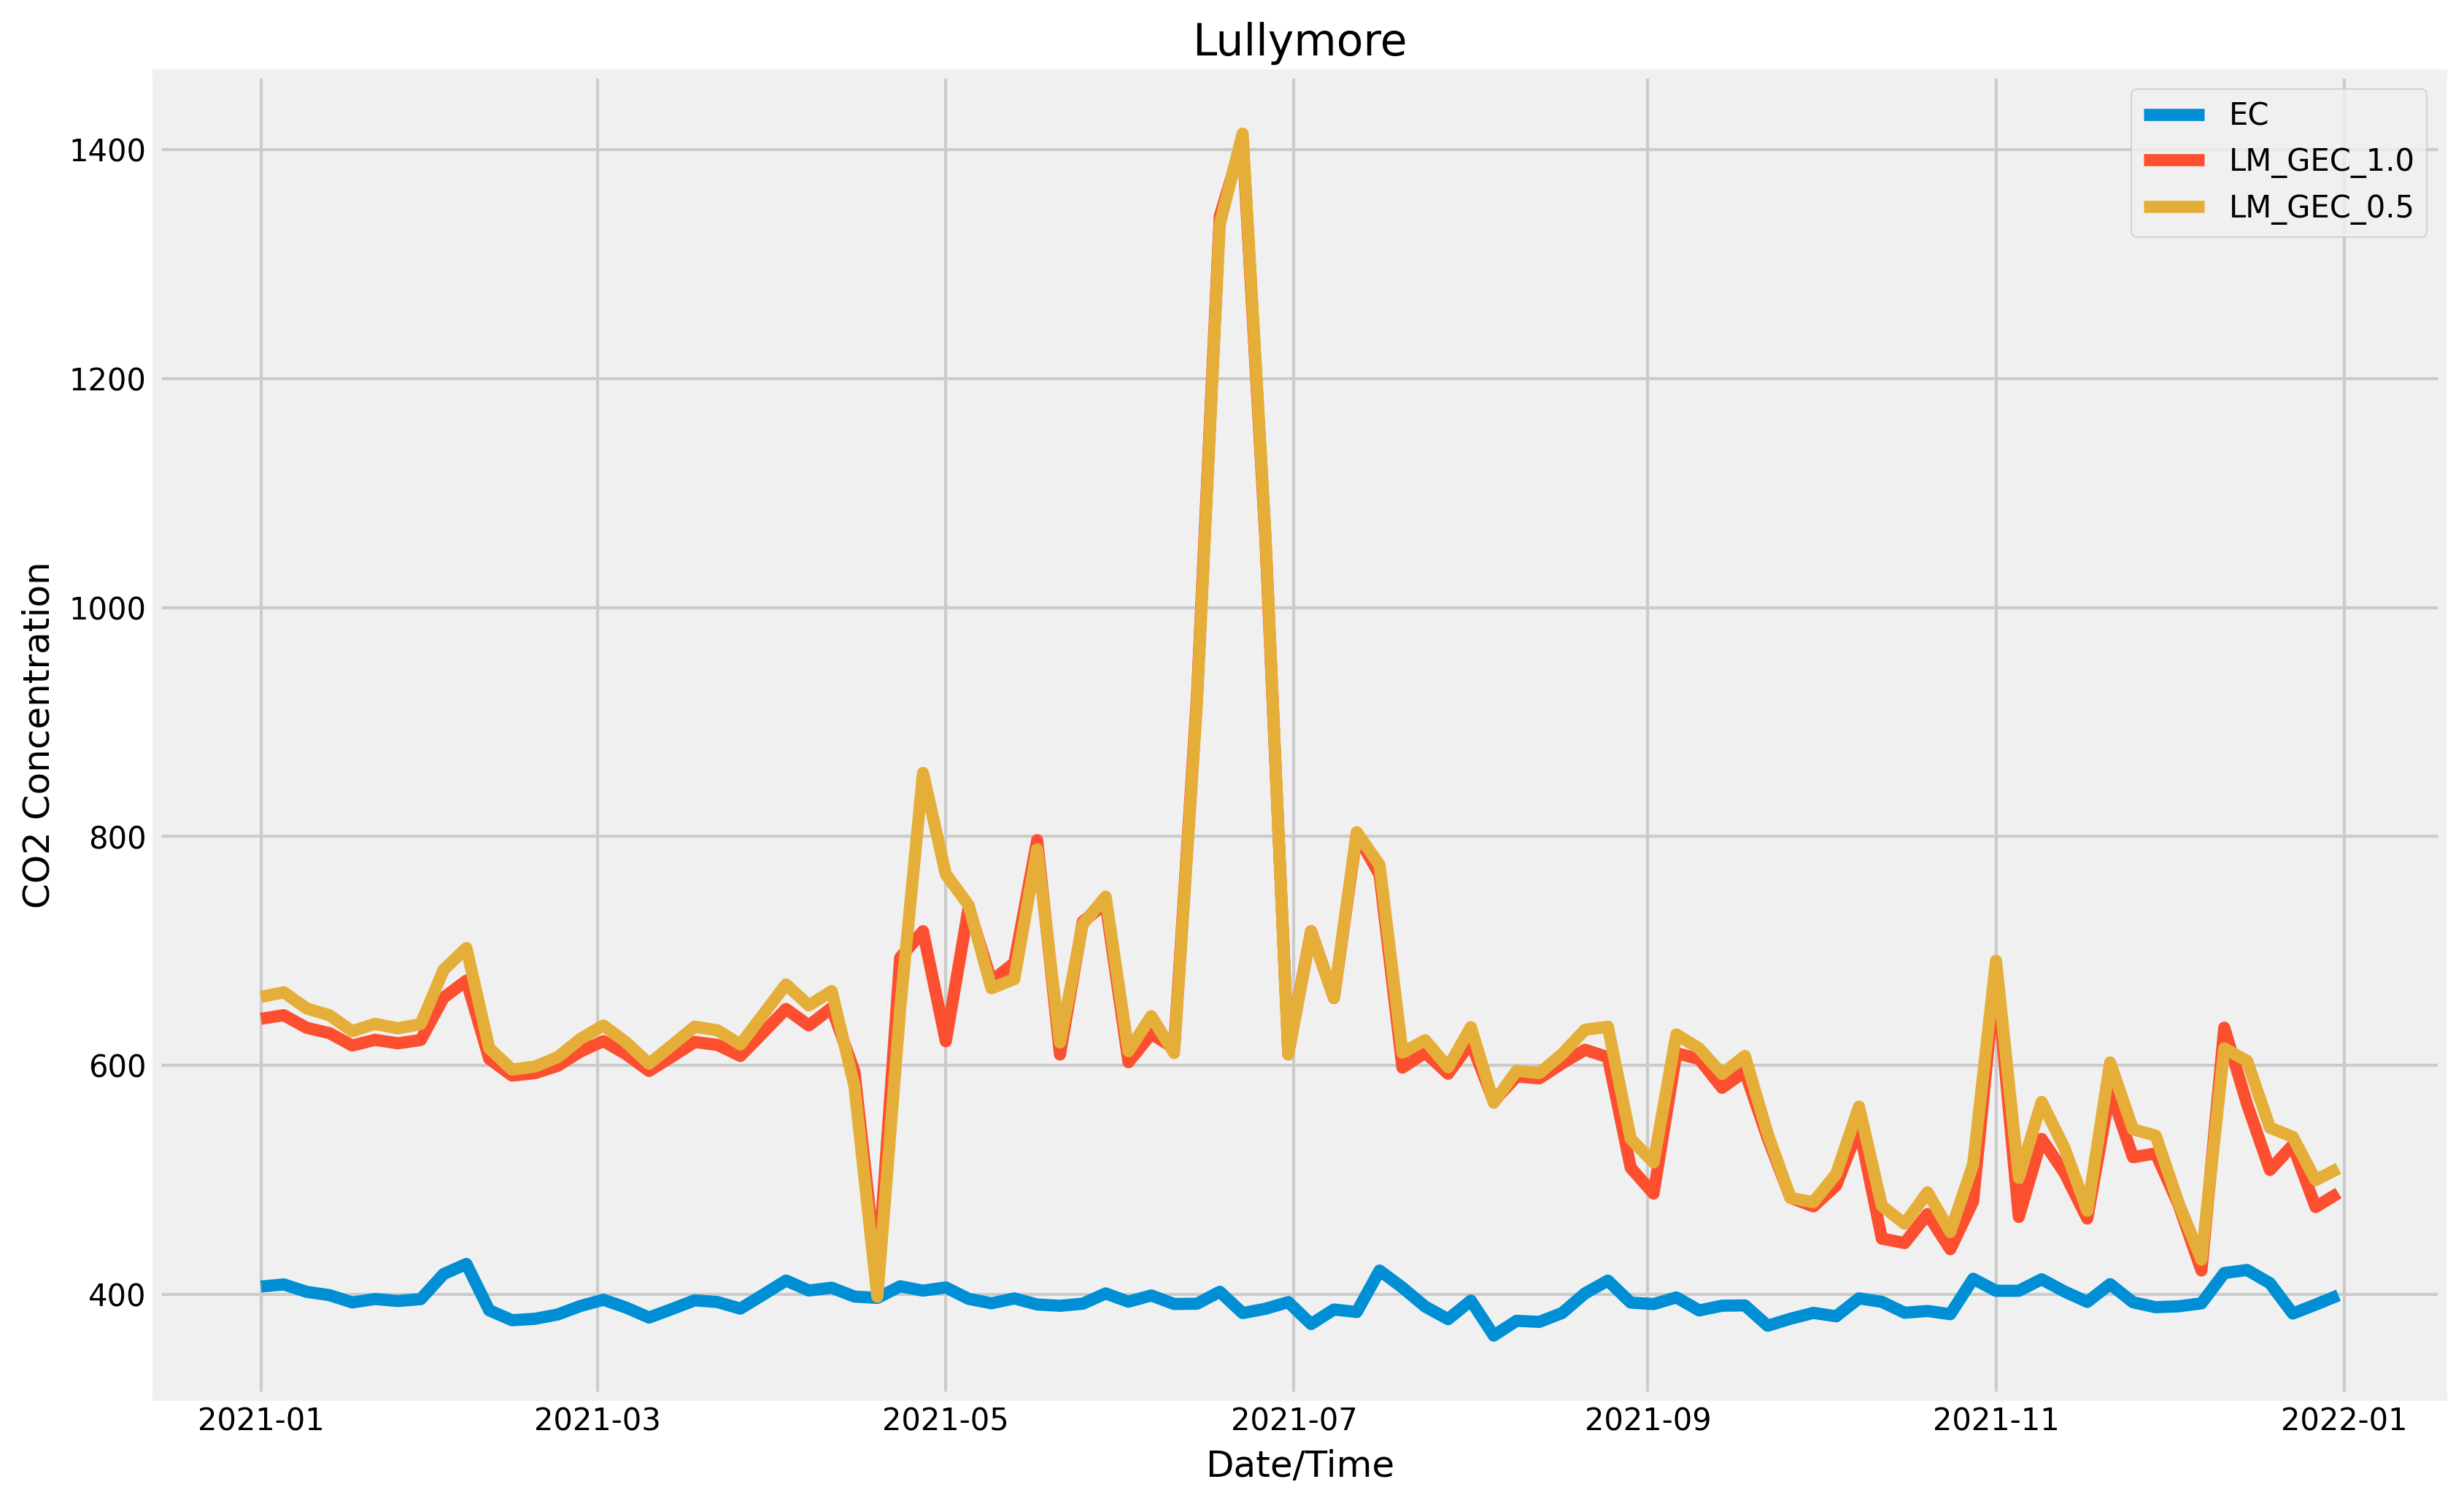

In [26]:
plt.figure(figsize=(12,8))
plt.plot(imputed_df['EC_CO2'].resample('4D').mean())
plt.plot(imputed_df_lm['1878_CO2Concentration'].resample('4D').mean())
plt.plot(imputed_df_lm['1879_CO2Concentration'].resample('4D').mean())
plt.legend(['EC', 'LM_GEC_1.0',
           'LM_GEC_0.5',], loc='upper right')
plt.title('Lullymore')
plt.xlabel('Date/Time')
plt.ylabel('CO2 Concentration')
plt.show()

# DATA FUSION + CALIBRATION

# For All Sensors from all ecotopes

In [27]:
#Split the data into training and testset
train_set_all,test_set_all=np.split(imputed_df,[int(.8*len(imputed_df))])
X_train_all=train_set_all[['1826_CO2Concentration', '1827_CO2Concentration',
                          '1824_CO2Concentration','1825_CO2Concentration','1467_CO2Concentration',
                          ]]

X_test_all=test_set_all[['1826_CO2Concentration','1827_CO2Concentration',
                          '1824_CO2Concentration','1825_CO2Concentration','1467_CO2Concentration',
                          ]]

y_train_all=train_set_all.EC_CO2
y_test_all=test_set_all.EC_CO2

In [28]:
X_train_all.head()

,1826_CO2Concentration,1827_CO2Concentration,1824_CO2Concentration,1825_CO2Concentration,1467_CO2Concentration
Timestamp,,,,,
2021-01-01 00:30:00,556.419996,525.459941,747.413311,506.555471,526.575259
2021-01-01 01:00:00,556.407666,525.503369,748.089496,506.746307,526.731379
2021-01-01 01:30:00,556.379760,525.601656,749.619810,507.178200,527.084705
2021-01-01 02:00:00,556.388147,525.572117,749.159894,507.048401,526.978518
2021-01-01 02:30:00,556.387098,525.575809,749.217384,507.064626,526.991791


In [29]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(n_estimators=1000, learning_rate=0.02, n_jobs=15)
xgb_model.fit(X_train_all, y_train_all,early_stopping_rounds=10,
             eval_set=[(X_test_all, y_test_all)], verbose=0)

[10:58:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.02, n_estimators=1000, n_jobs=15)

# Evaluation on training set

In [30]:
y_pred_all=xgb_model.predict(X_train_all)

In [31]:
print('MAE:', mean_absolute_error(y_pred_all, y_train_all))
print('RMSE:', np.sqrt(mean_squared_error(y_pred_all, y_train_all)))
print('R2:',r2_score(y_pred_all, y_train_all))

MAE: 10.83155666728453
RMSE: 19.719821678013048
R2: -0.5362634793197338


In [32]:
train_set_all=train_set_all.assign(DataFusion=y_pred_all)


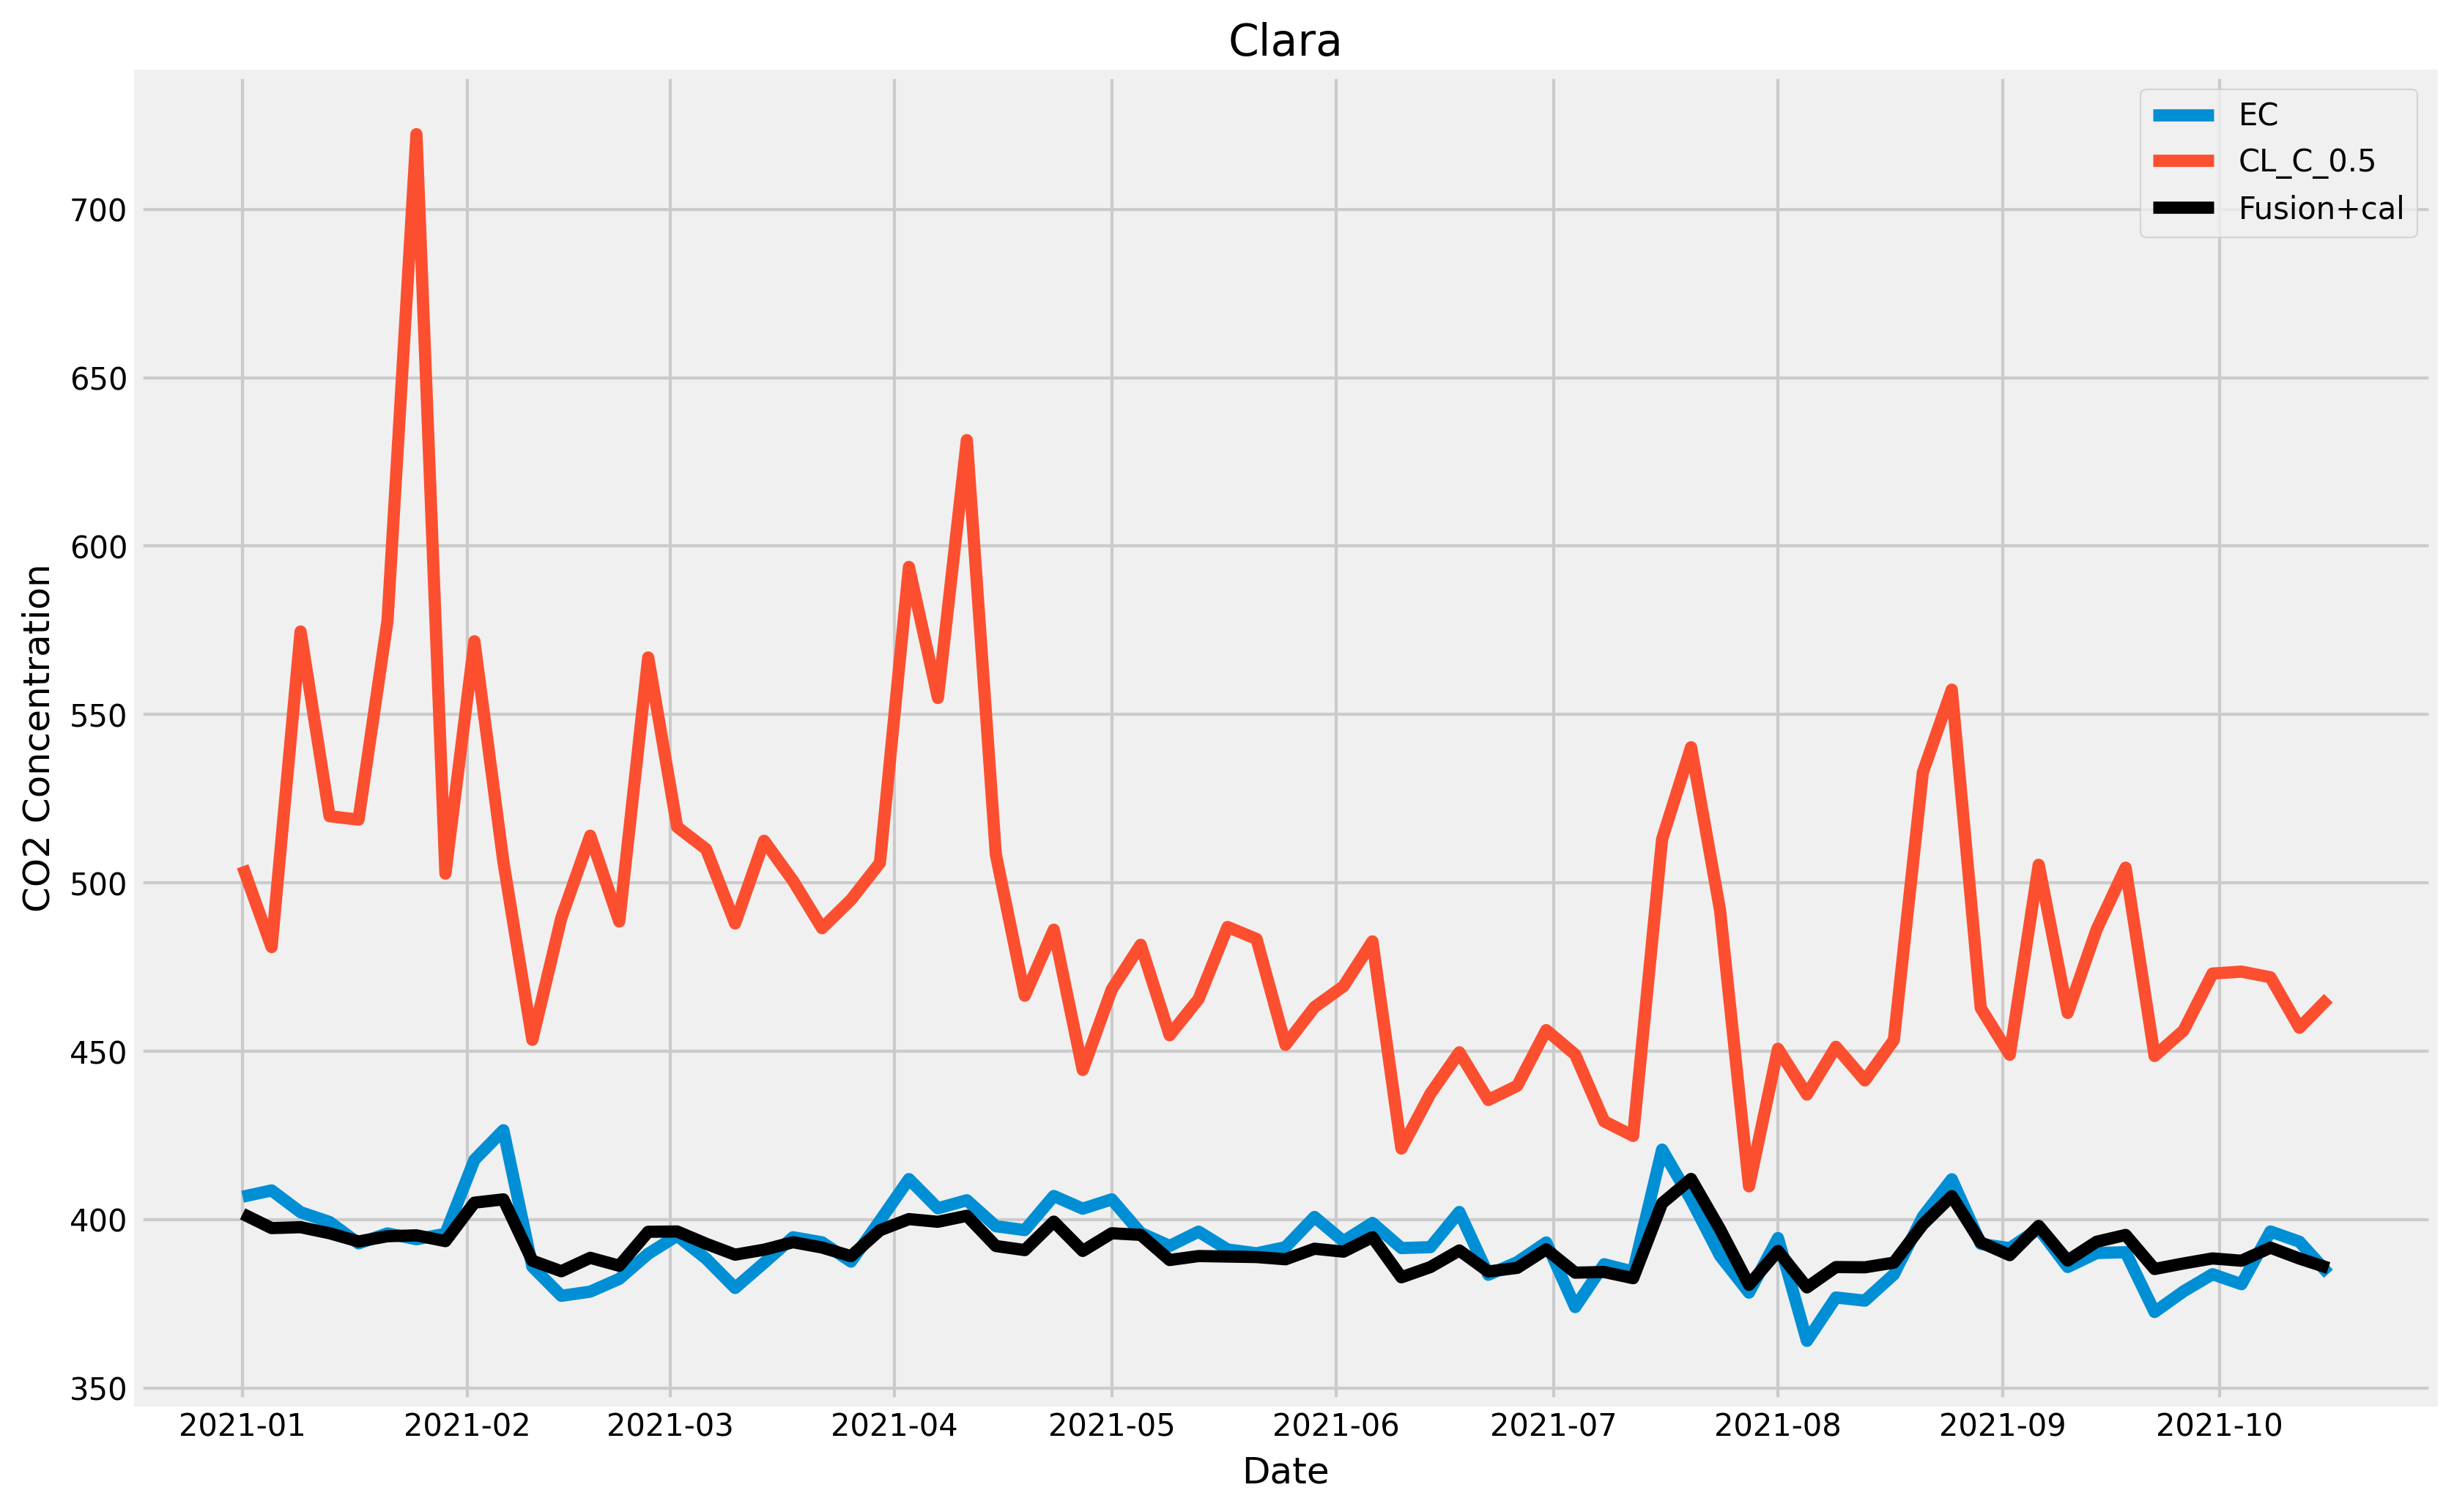

In [33]:
ec_sensors_col=train_set_all[['EC_CO2','1826_CO2Concentration',
                         '1827_CO2Concentration','1824_CO2Concentration', '1825_CO2Concentration',
                             '1467_CO2Concentration', 'DataFusion']]
plt.figure(figsize=(12,8))
plt.plot(ec_sensors_col['EC_CO2'].resample('4D').mean())

#plt.plot(ec_sensors_col['1826_CO2Concentration'].resample('4D').mean())
#plt.plot(ec_sensors_col['1827_CO2Concentration'].resample('4D').mean())

#plt.plot(ec_sensors_col['1824_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['1825_CO2Concentration'].resample('4D').mean())

#plt.plot(ec_sensors_col['1467_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['DataFusion'].resample('4D').mean(), color='black')


plt.legend(['EC',
           'CL_C_0.5', 
            'Fusion+cal'], loc='upper right')
plt.title('Clara')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.show()

# Evaluation on test set

In [34]:
y_pred_all=xgb_model.predict(X_test_all)

In [35]:
print('MAE:', mean_absolute_error(y_pred_all, y_test_all))
print('RMSE:', np.sqrt(mean_squared_error(y_test_all, y_pred_all)))
print('R2:',r2_score(y_test_all, y_pred_all))

MAE: 9.081409991784962
RMSE: 18.291979958419727
R2: 0.3575909171477909


In [36]:
test_set_all=test_set_all.assign(DataFusion=y_pred_all)


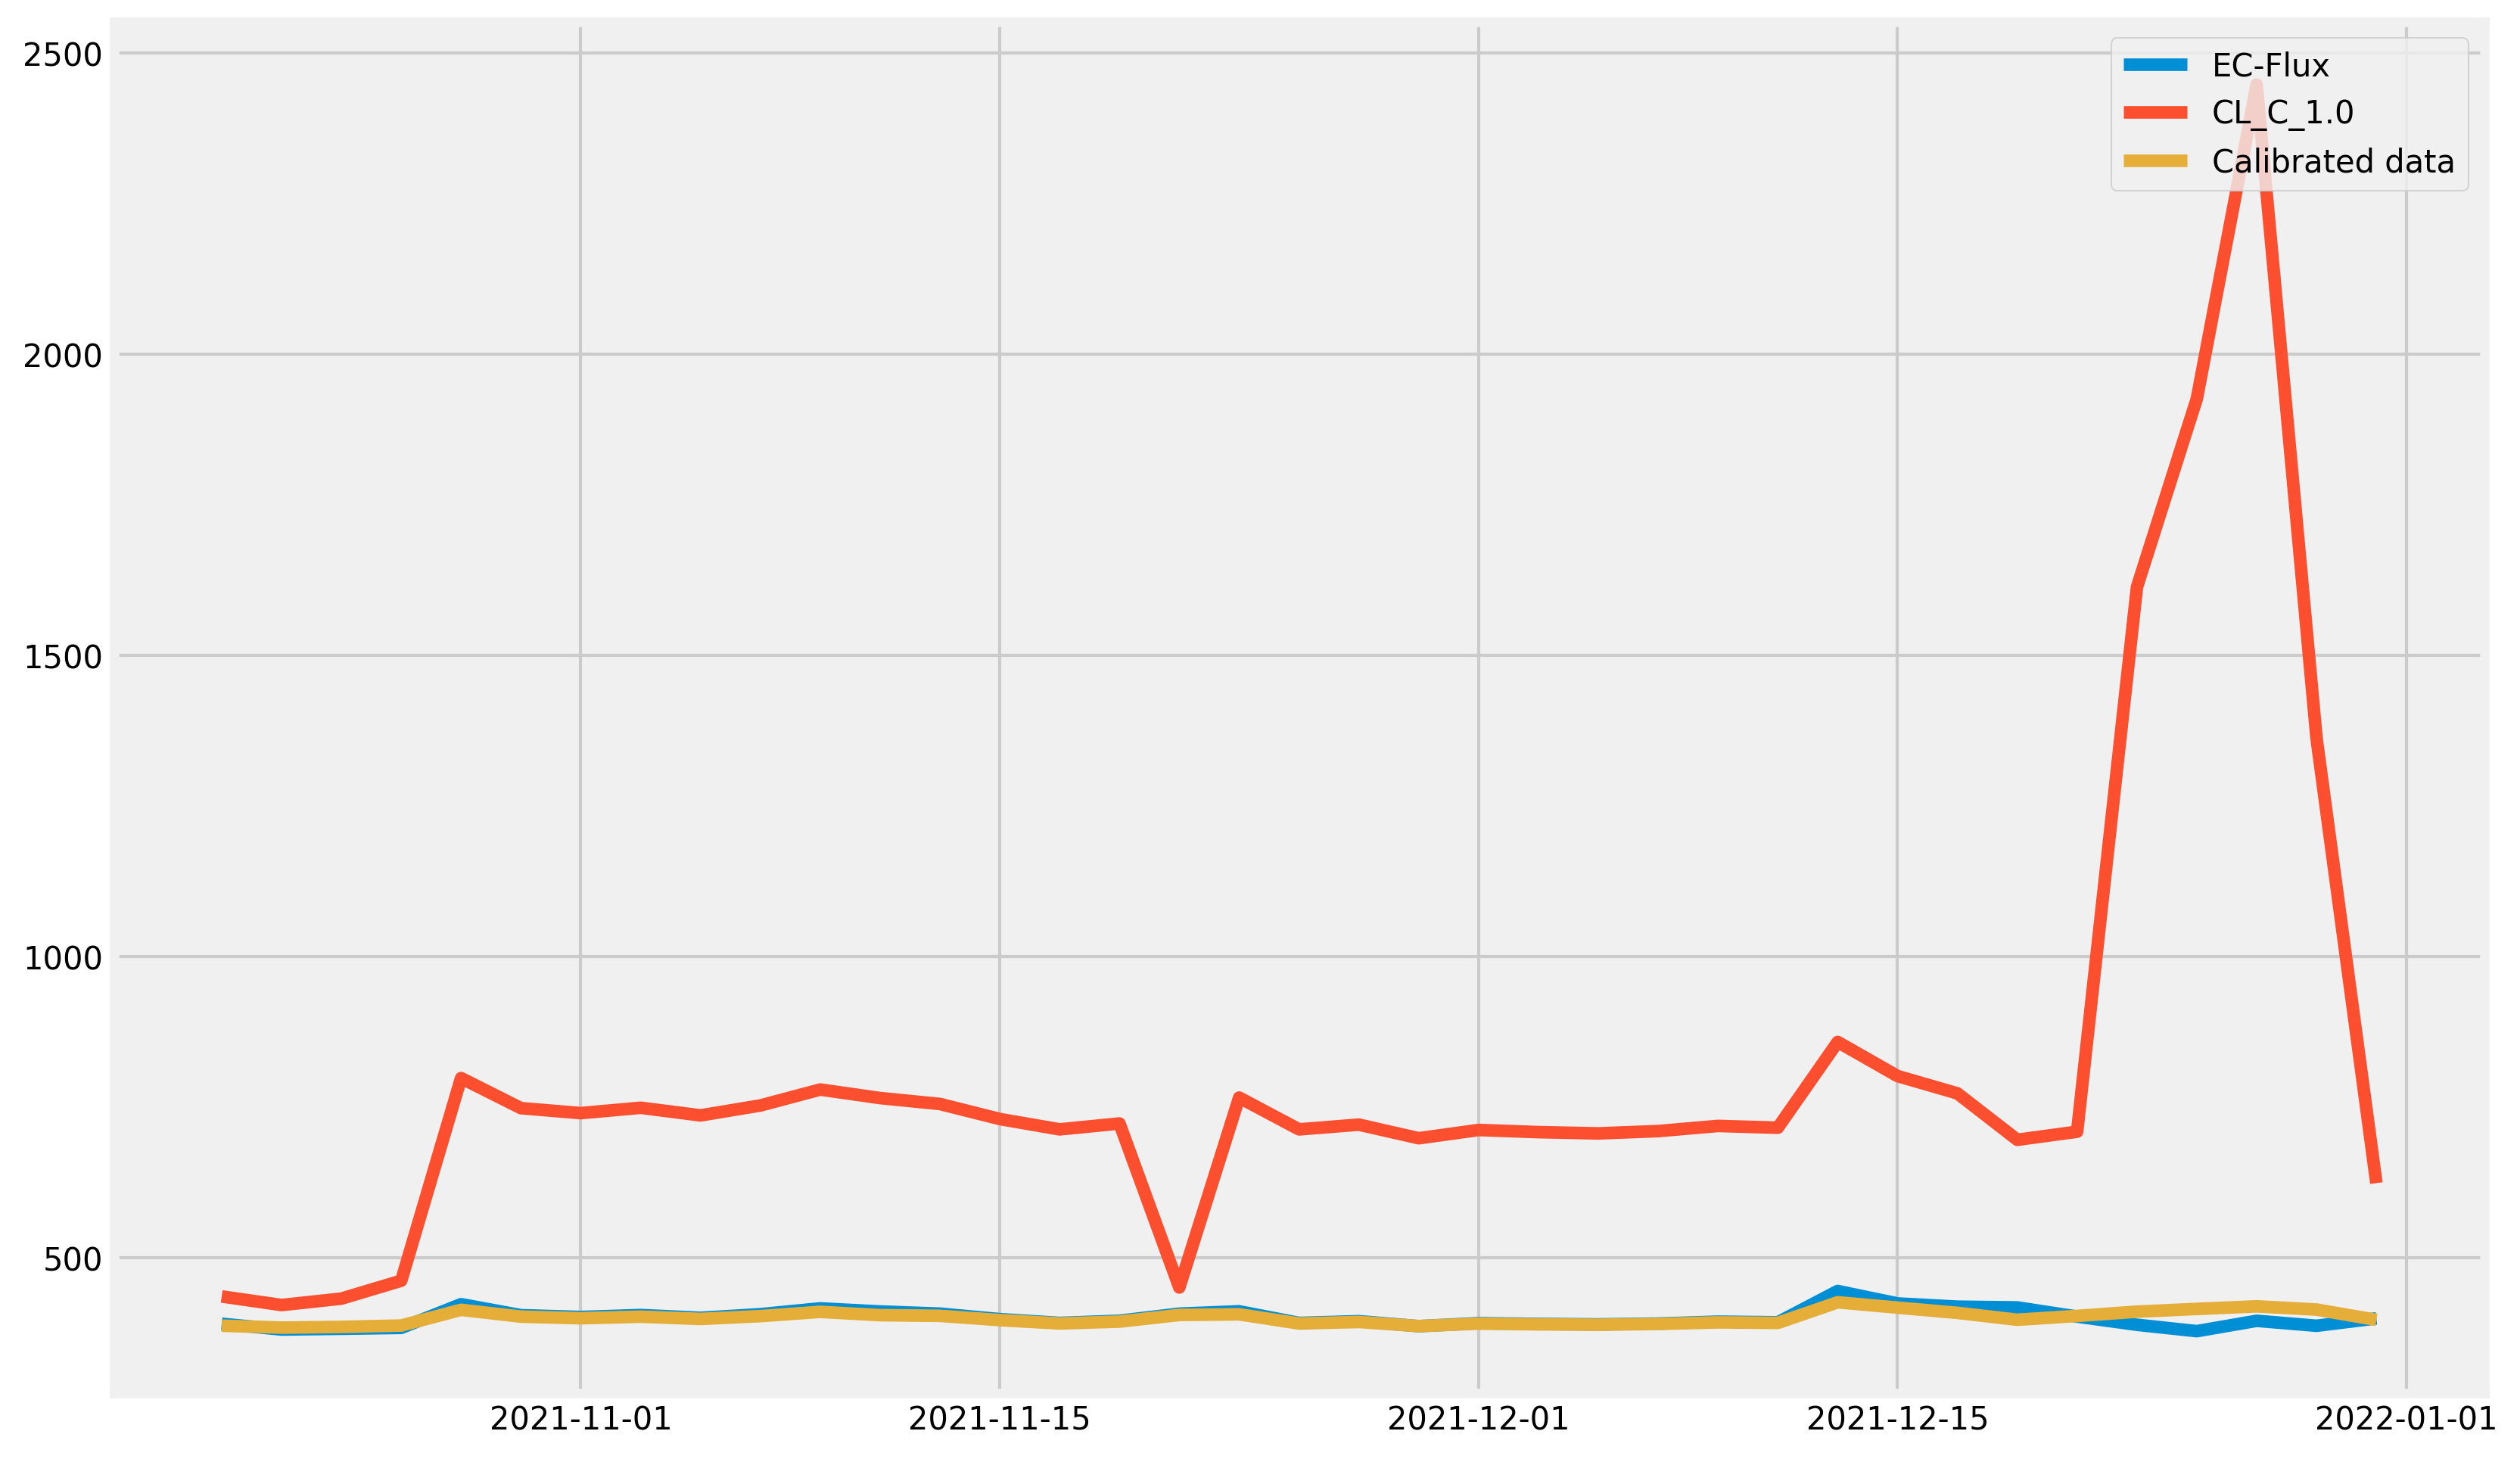

In [37]:
ec_sensors_col=test_set_all[['EC_CO2','1826_CO2Concentration',
                         '1827_CO2Concentration','1824_CO2Concentration', '1825_CO2Concentration',
                             '1467_CO2Concentration', 'DataFusion']]
plt.figure(figsize=(12,8))
plt.plot(ec_sensors_col['EC_CO2'].resample('2D').mean())

#plt.plot(ec_sensors_col['1826_CO2Concentration'].resample('4D').mean())
#plt.plot(ec_sensors_col['1827_CO2Concentration'].resample('4D').mean())

plt.plot(ec_sensors_col['1824_CO2Concentration'].resample('2D').mean())
#plt.plot(ec_sensors_col['1825_CO2Concentration'].resample('4D').mean())

#plt.plot(ec_sensors_col['1467_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['DataFusion'].resample('2D').mean())



plt.legend(['EC-Flux',
           'CL_C_1.0',  
            'Calibrated data'], loc='upper right')
plt.show()

# For sensors on same ecotopes (EC)

In [38]:
#Split the data into training and testset
train_set_se,test_set_se=np.split(imputed_df,[int(.8*len(imputed_df))])
X_train_se=train_set_se[['1827_CO2Concentration',
                         '1826_CO2Concentration']]
X_test_se=test_set_se[['1827_CO2Concentration',
                         '1826_CO2Concentration']]

y_train_se=train_set_se.EC_CO2
y_test_se=test_set_se.EC_CO2

In [39]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(n_estimators=1000, learning_rate=0.02, n_jobs=15)
xgb_model.fit(X_train_se, y_train_se,early_stopping_rounds=10,
             eval_set=[(X_test_se, y_test_se)], verbose=0)

[10:58:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.02, n_estimators=1000, n_jobs=15)

In [40]:
y_pred_se=xgb_model.predict(X_test_se)

In [41]:
print('MAE:', mean_absolute_error(y_pred_se, y_test_se))
print('RMSE:', np.sqrt(mean_squared_error(y_test_se, y_pred_se)))
print('R2:',r2_score(y_test_se, y_pred_se))

MAE: 8.427828781406804
RMSE: 18.03277808952326
R2: 0.3756681144335421


In [42]:
test_set_se=test_set_se.assign(DataFusion=y_pred_se)

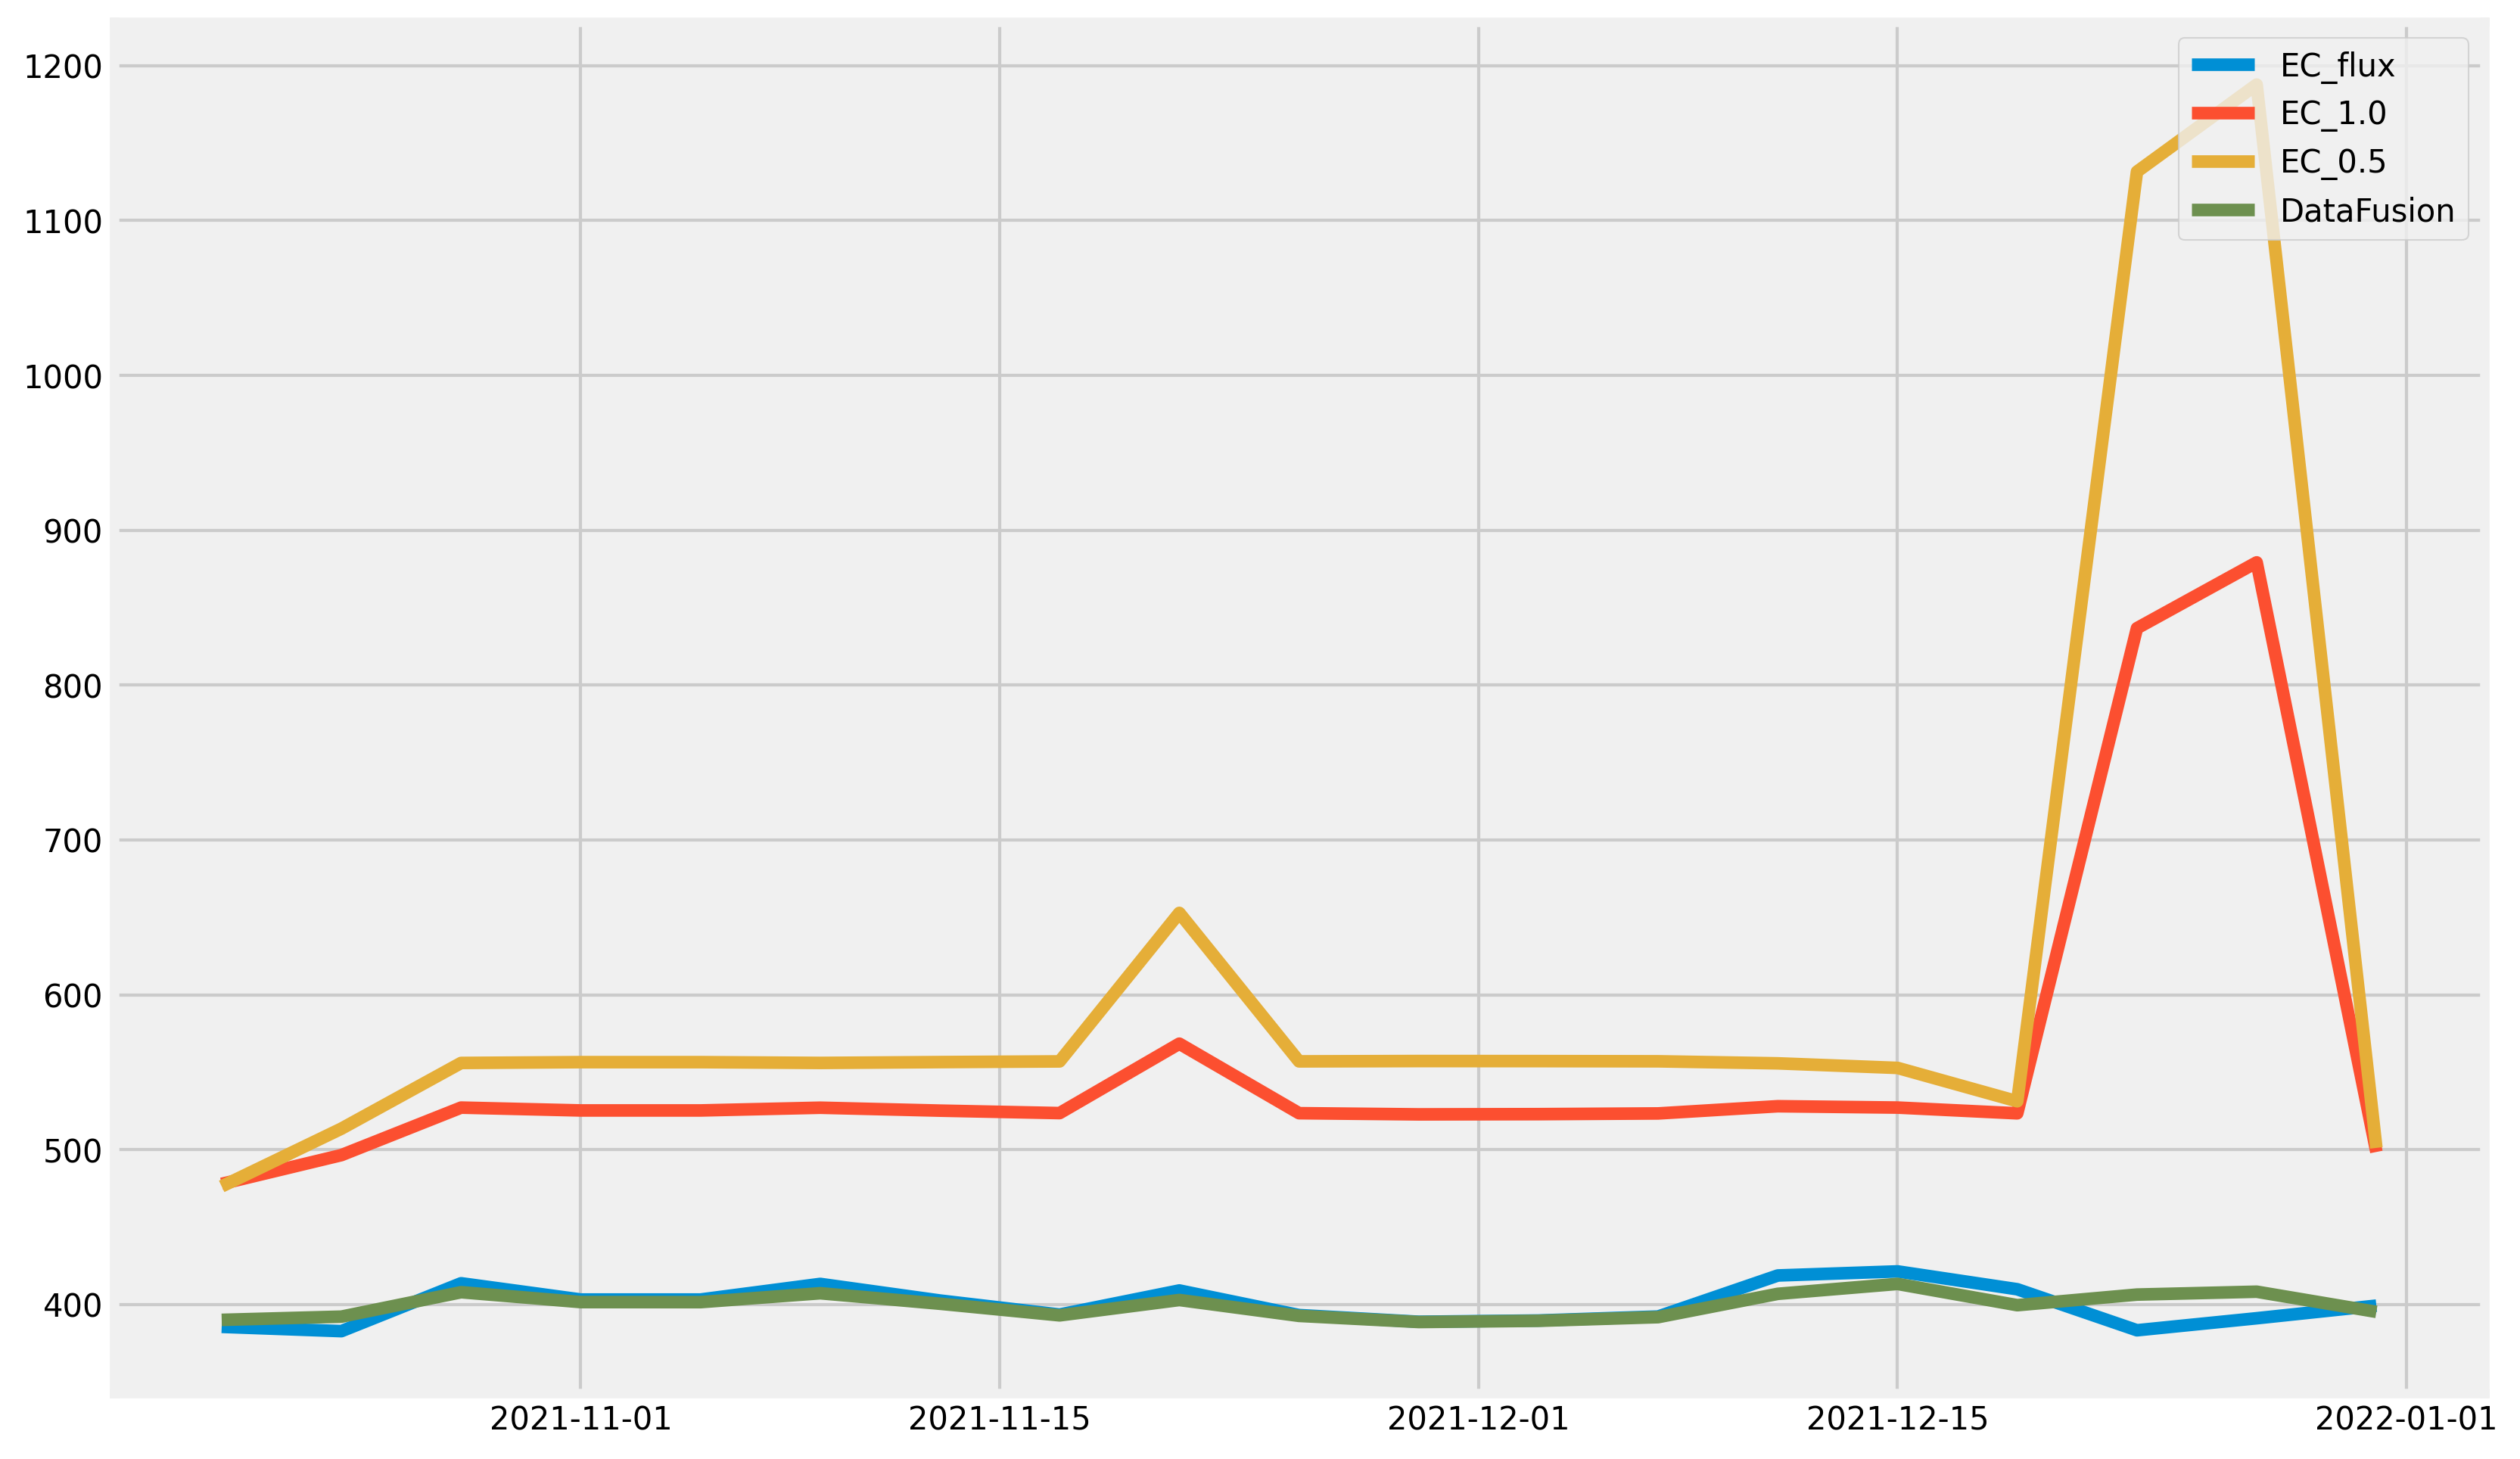

In [43]:
ec_sensors_col=test_set_se[['EC_CO2','1827_CO2Concentration',
                         '1826_CO2Concentration','DataFusion']]
plt.figure(figsize=(12,8))
plt.plot(ec_sensors_col['EC_CO2'].resample('4D').mean())

plt.plot(ec_sensors_col['1827_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['1826_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['DataFusion'].resample('4D').mean())


plt.legend([ 'EC_flux','EC_1.0', 'EC_0.5', 'DataFusion'], loc='upper right')

# for sensors on same height profile (1 METER)

In [44]:
#Split the data into training and testset
train_set_1,test_set_1=np.split(imputed_df,[int(.8*len(imputed_df))])
X_train_1=train_set_1[['1827_CO2Concentration', '1824_CO2Concentration', '1467_CO2Concentration']]
X_test_1=test_set_1[['1827_CO2Concentration', '1824_CO2Concentration', '1467_CO2Concentration']]

y_train_1=train_set_1.EC_CO2
y_test_1=test_set_1.EC_CO2

In [45]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(n_estimators=1000, learning_rate=0.02, n_jobs=15)
xgb_model.fit(X_train_1, y_train_1,early_stopping_rounds=10,
             eval_set=[(X_test_1, y_test_1)], verbose=0)

[10:58:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.02, n_estimators=1000, n_jobs=15)

In [46]:
y_pred_1=xgb_model.predict(X_test_1)

In [47]:
print('MAE:', mean_absolute_error(y_pred_1, y_test_1))
print('RMSE:', np.sqrt(mean_squared_error(y_test_1, y_pred_1)))
print('R2:',r2_score(y_test_1, y_pred_1))

MAE: 8.299778470351463
RMSE: 17.6607041141862
R2: 0.4011662515673414


In [48]:
test_set_1=test_set_1.assign(DataFusion=y_pred_1)

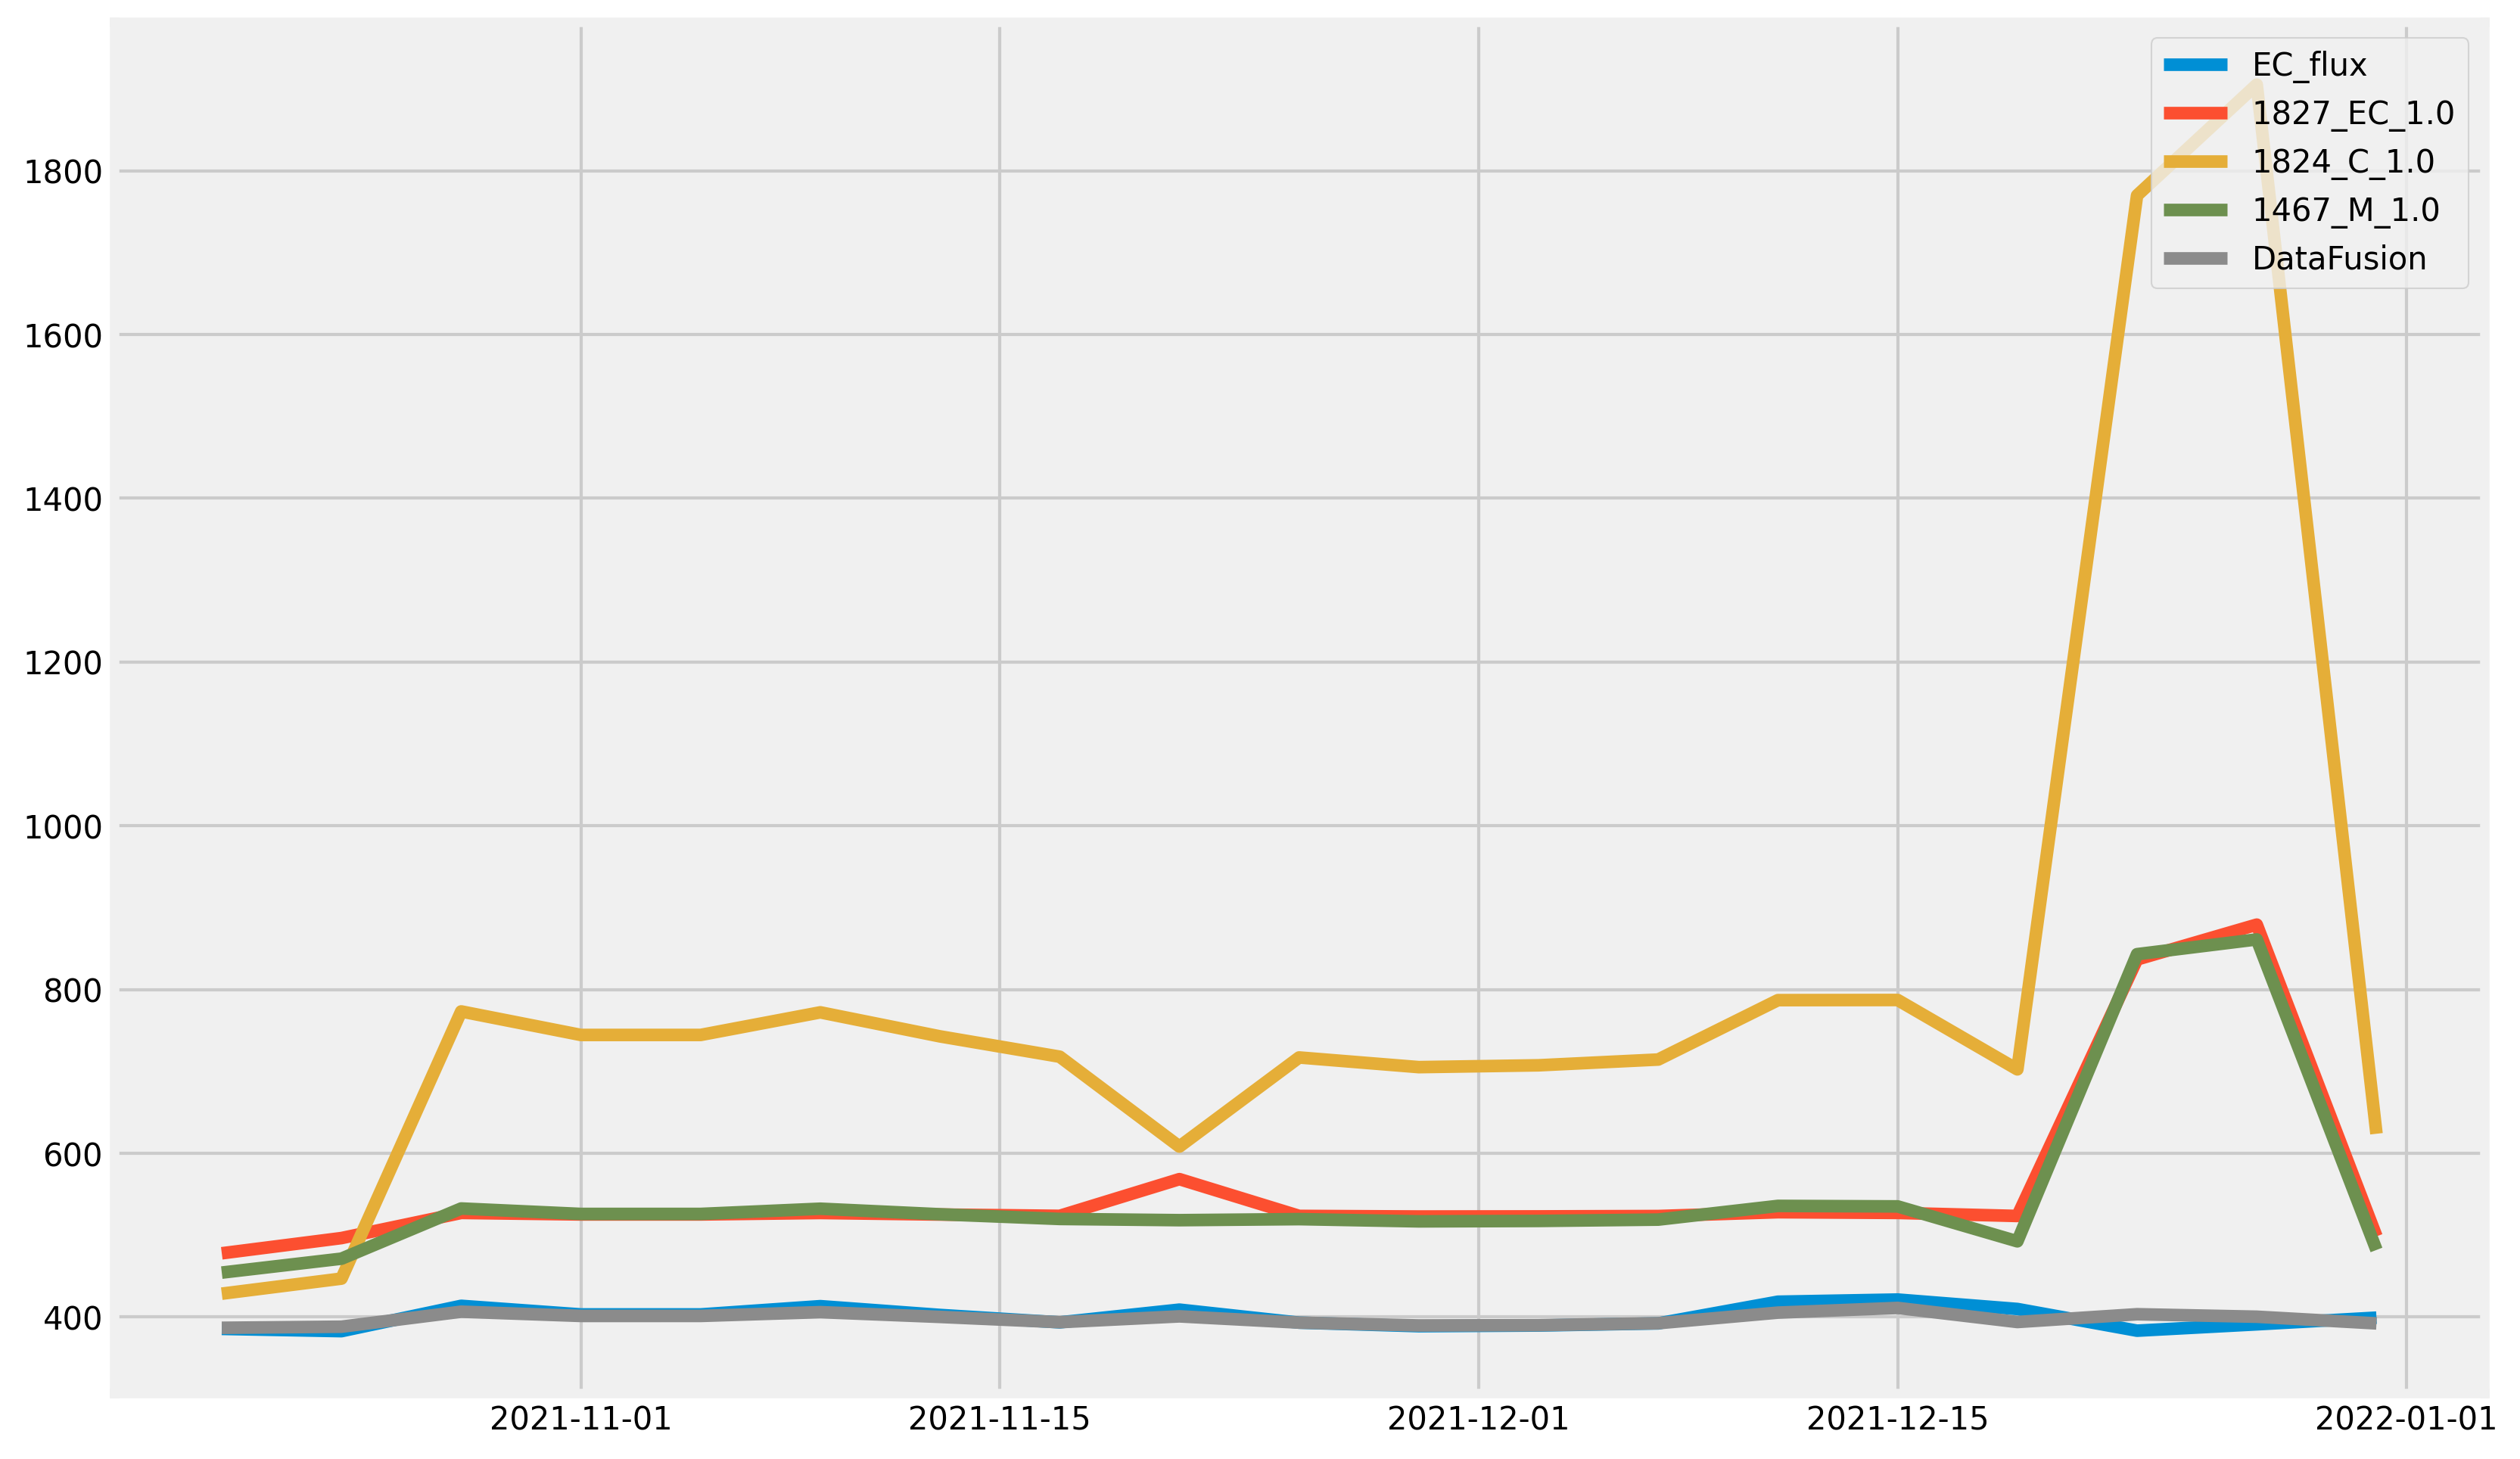

In [49]:
ec_sensors_col=test_set_1[['EC_CO2','1827_CO2Concentration',
                         '1824_CO2Concentration','1467_CO2Concentration','DataFusion']]
plt.figure(figsize=(12,8))
plt.plot(ec_sensors_col['EC_CO2'].resample('4D').mean())

plt.plot(ec_sensors_col['1827_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['1824_CO2Concentration'].resample('4D').mean())

plt.plot(ec_sensors_col['1467_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['DataFusion'].resample('4D').mean())


plt.legend([ 'EC_flux', '1827_EC_1.0','1824_C_1.0','1467_M_1.0','DataFusion'], loc='upper right')
plt.show()

# 0.5 Meters

In [50]:
#Split the data into training and testset
train_set_0,test_set_0=np.split(imputed_df,[int(.8*len(imputed_df))])
X_train_0=train_set_0[['1826_CO2Concentration',
                         '1825_CO2Concentration']]

X_test_0=test_set_0[['1826_CO2Concentration',
                         '1825_CO2Concentration']]
y_train_0=train_set_0.EC_CO2
y_test_0=test_set_0.EC_CO2

In [51]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(n_estimators=1000, learning_rate=0.02, n_jobs=15)
xgb_model.fit(X_train_0, y_train_0,early_stopping_rounds=10,
             eval_set=[(X_test_0, y_test_0)], verbose=0)

[10:59:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.02, n_estimators=1000, n_jobs=15)

In [52]:
y_pred_0=xgb_model.predict(X_test_0)

In [53]:
print('MAE:', mean_absolute_error(y_pred_0, y_test_0))
print('RMSE:', np.sqrt(mean_squared_error(y_test_0, y_pred_0)))
print('R2:',r2_score(y_test_0, y_pred_0))

MAE: 9.650663596621623
RMSE: 18.51997719899125
R2: 0.34147671758893317


In [54]:
test_set_1=test_set_1.assign(DataFusion=y_pred_1)

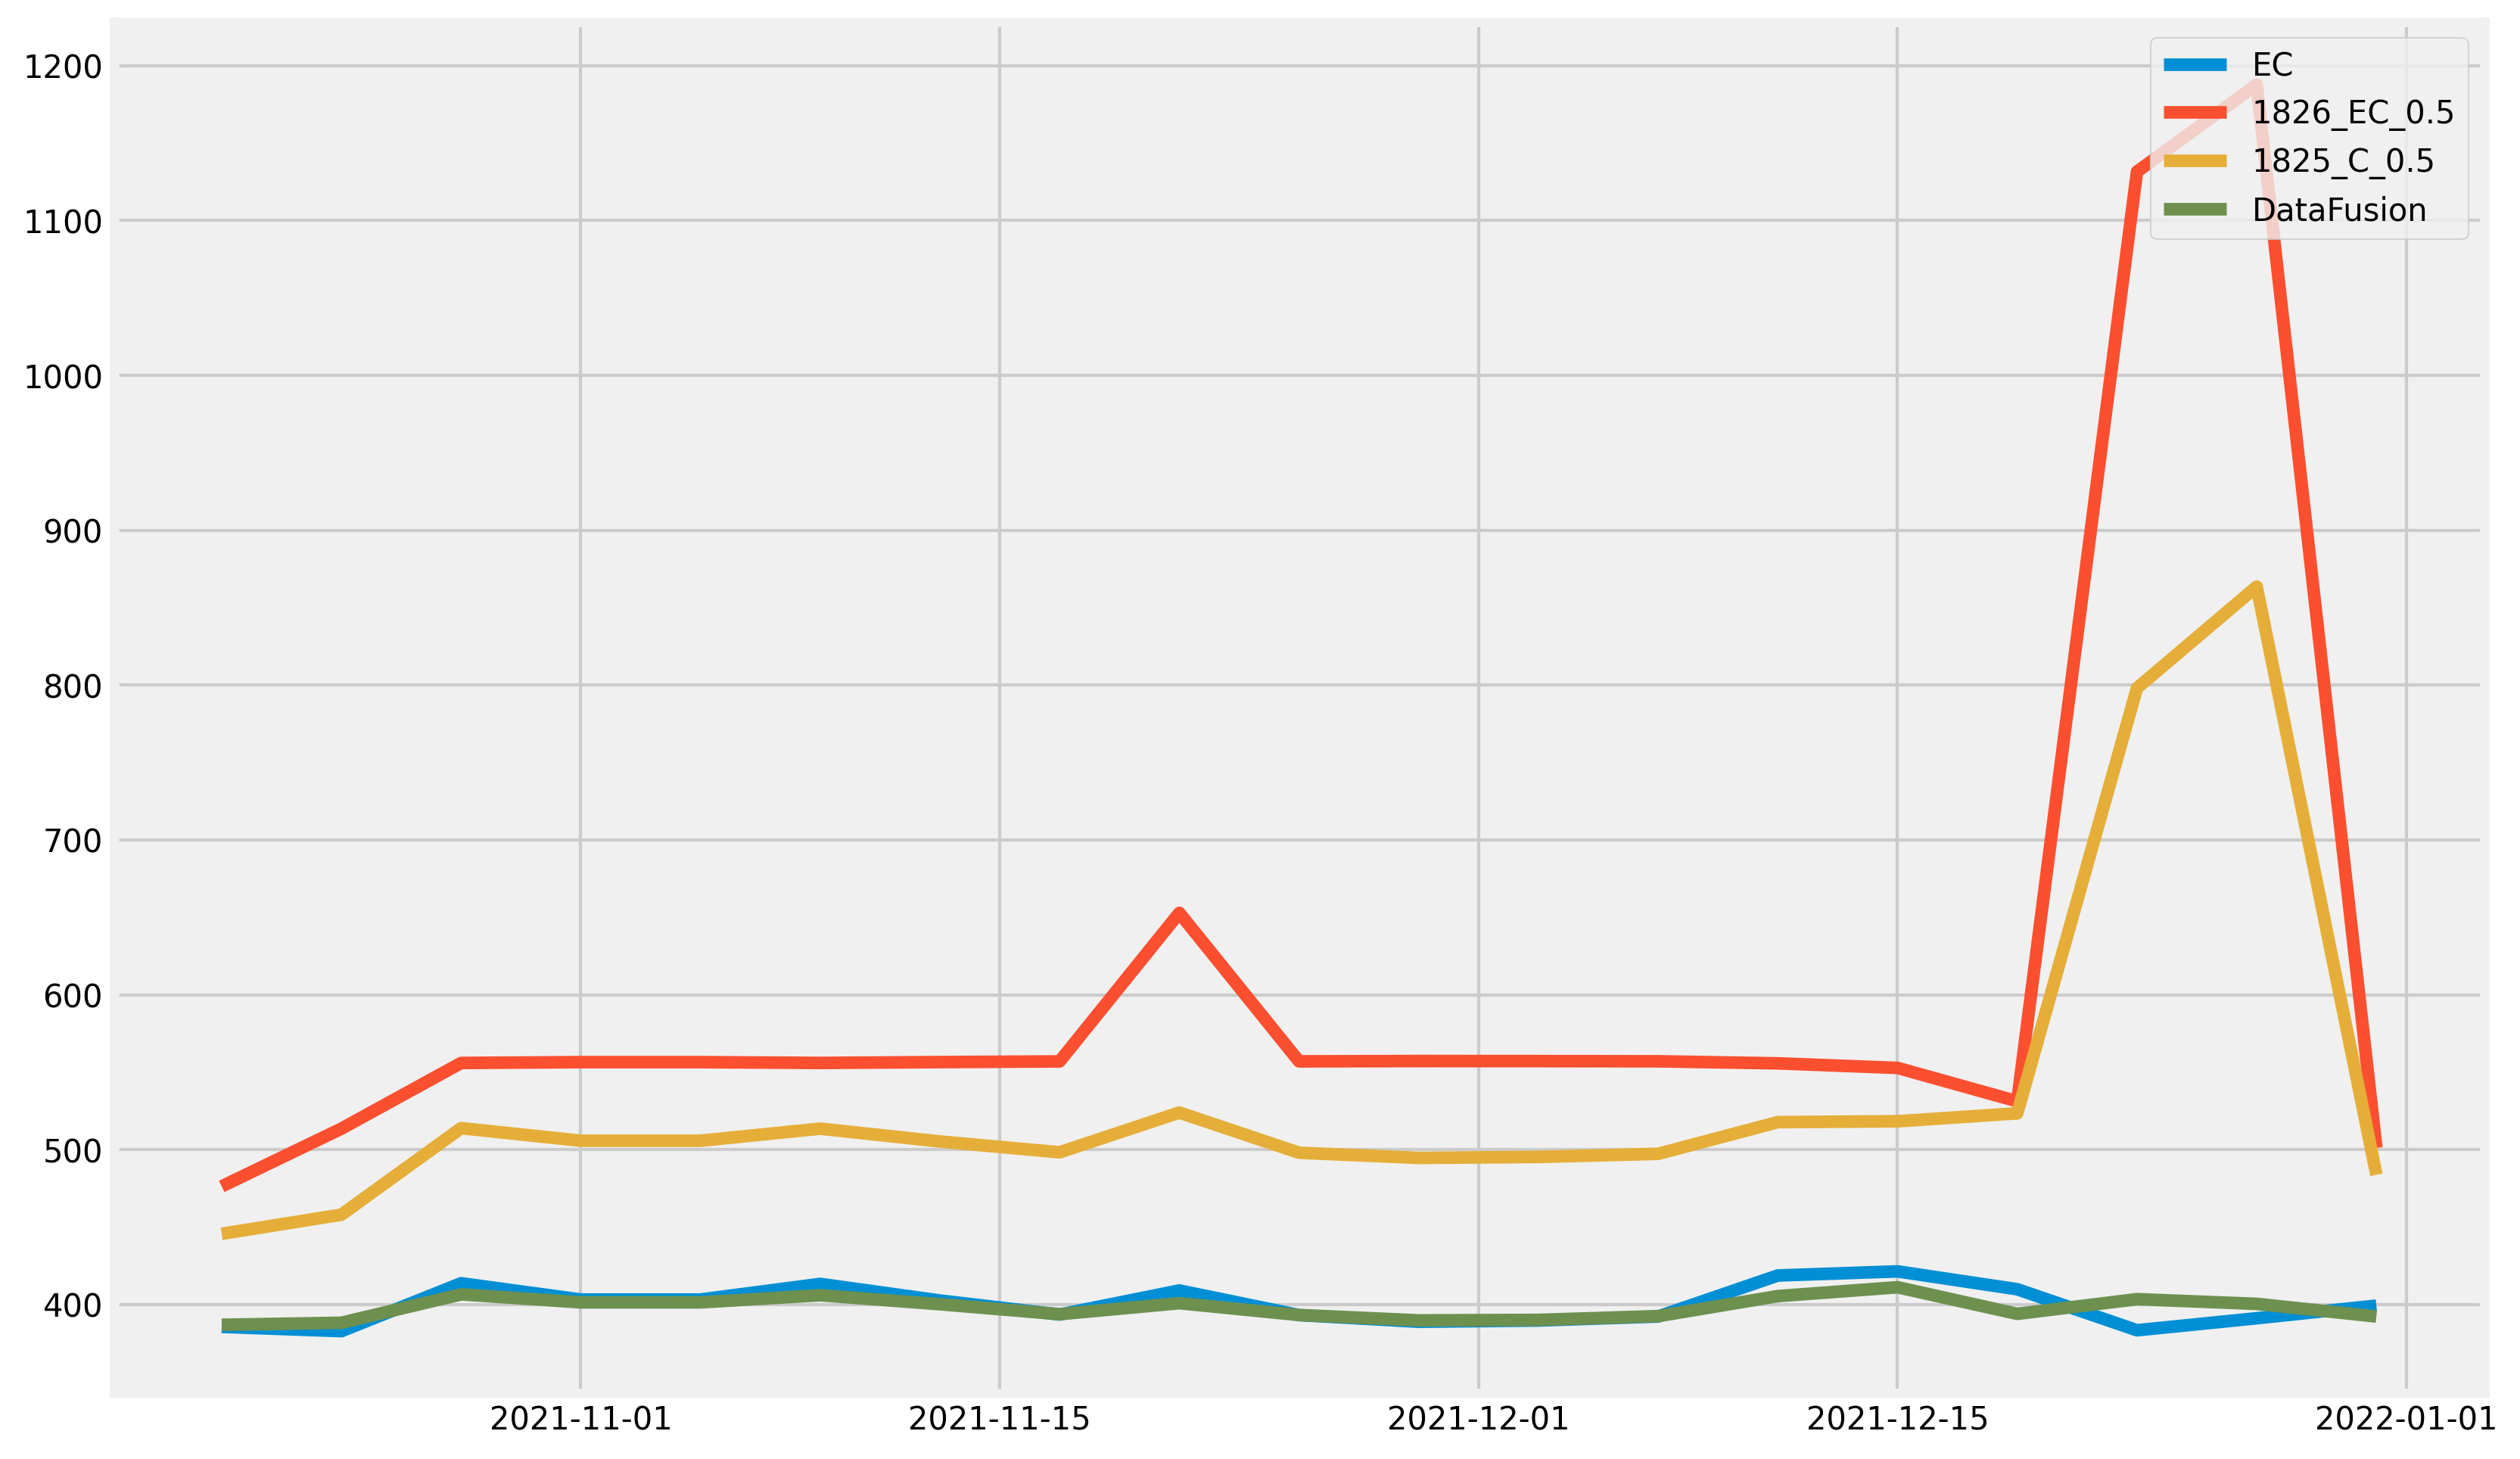

In [55]:
ec_sensors_col=test_set_1[['EC_CO2','1826_CO2Concentration',
                         '1825_CO2Concentration','DataFusion']]
plt.figure(figsize=(12,8))
plt.plot(ec_sensors_col['EC_CO2'].resample('4D').mean())

plt.plot(ec_sensors_col['1826_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['1825_CO2Concentration'].resample('4D').mean())


plt.plot(ec_sensors_col['DataFusion'].resample('4D').mean())


plt.legend([ 'EC', '1826_EC_0.5','1825_C_0.5','DataFusion'], loc='upper right')
plt.show()

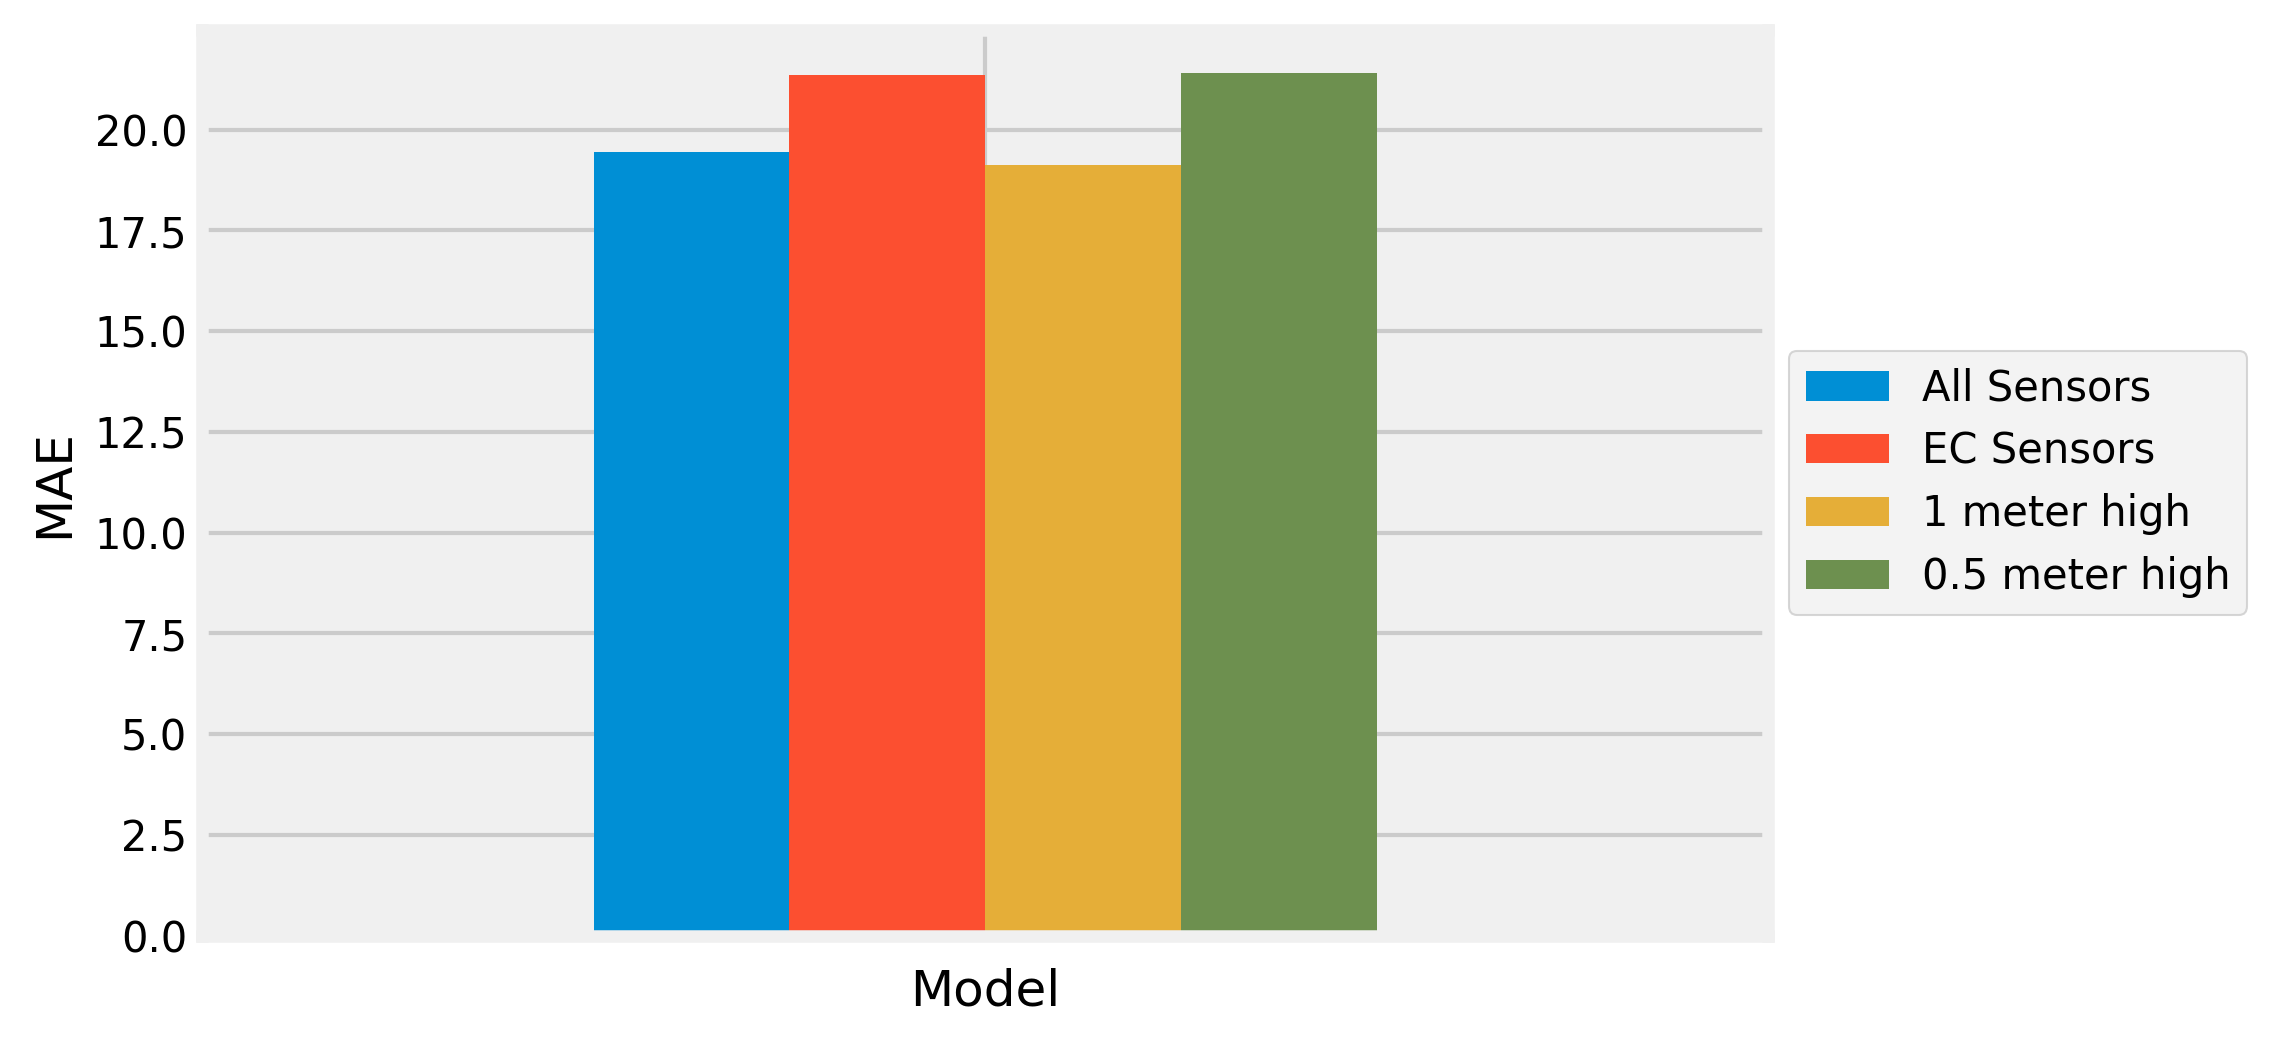

In [56]:
#compare the mean Absolute error between the sensors and ec data
plotdata = pd.DataFrame({
   "All Sensors":[19.45 ],
    "EC Sensors":[21.36],
    "1 meter high":[19.13],
    "0.5 meter high":[21.41],
    
    }, 
   index=[""]
)
plotdata.plot(kind="bar")
#plt.title("Performance of different models ")
plt.xlabel("Model")
plt.ylabel("MAE")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Calibration Lullymore site

In [57]:
#Split the data into training and testset
train_set_all_lm,test_set_all_lm=np.split(imputed_df_lm,[int(.8*len(imputed_df_lm))])
X_train_all_lm=train_set_all_lm[['1878_CO2Concentration', '1879_CO2Concentration']]

X_test_all_lm=test_set_all_lm[['1878_CO2Concentration', '1879_CO2Concentration']]
                          

y_train_all_lm=train_set_all_lm.EC_CO2
y_test_all_lm=test_set_all_lm.EC_CO2

In [ ]:
y_test_all_lm

In [58]:
#fit model
xgb_model.fit(X_train_all_lm, y_train_all_lm,early_stopping_rounds=10,
             eval_set=[(X_test_all_lm, y_test_all_lm)], verbose=0)

[10:59:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.02, n_estimators=1000, n_jobs=15)

# Evaluation on Training set Lullymore

In [59]:
y_pred_all_lm=xgb_model.predict(X_train_all_lm)

In [60]:
print('MAE:', mean_absolute_error(y_pred_all_lm, y_train_all_lm))
print('RMSE:', np.sqrt(mean_squared_error(y_pred_all_lm, y_train_all_lm)))
print('R2:',r2_score(y_pred_all_lm, y_train_all_lm))

MAE: 9.578683734838116
RMSE: 21.357472452771187
R2: -1.0468779198722142


In [61]:
train_set_all_lm=train_set_all_lm.assign(DataFusion=y_pred_all_lm)

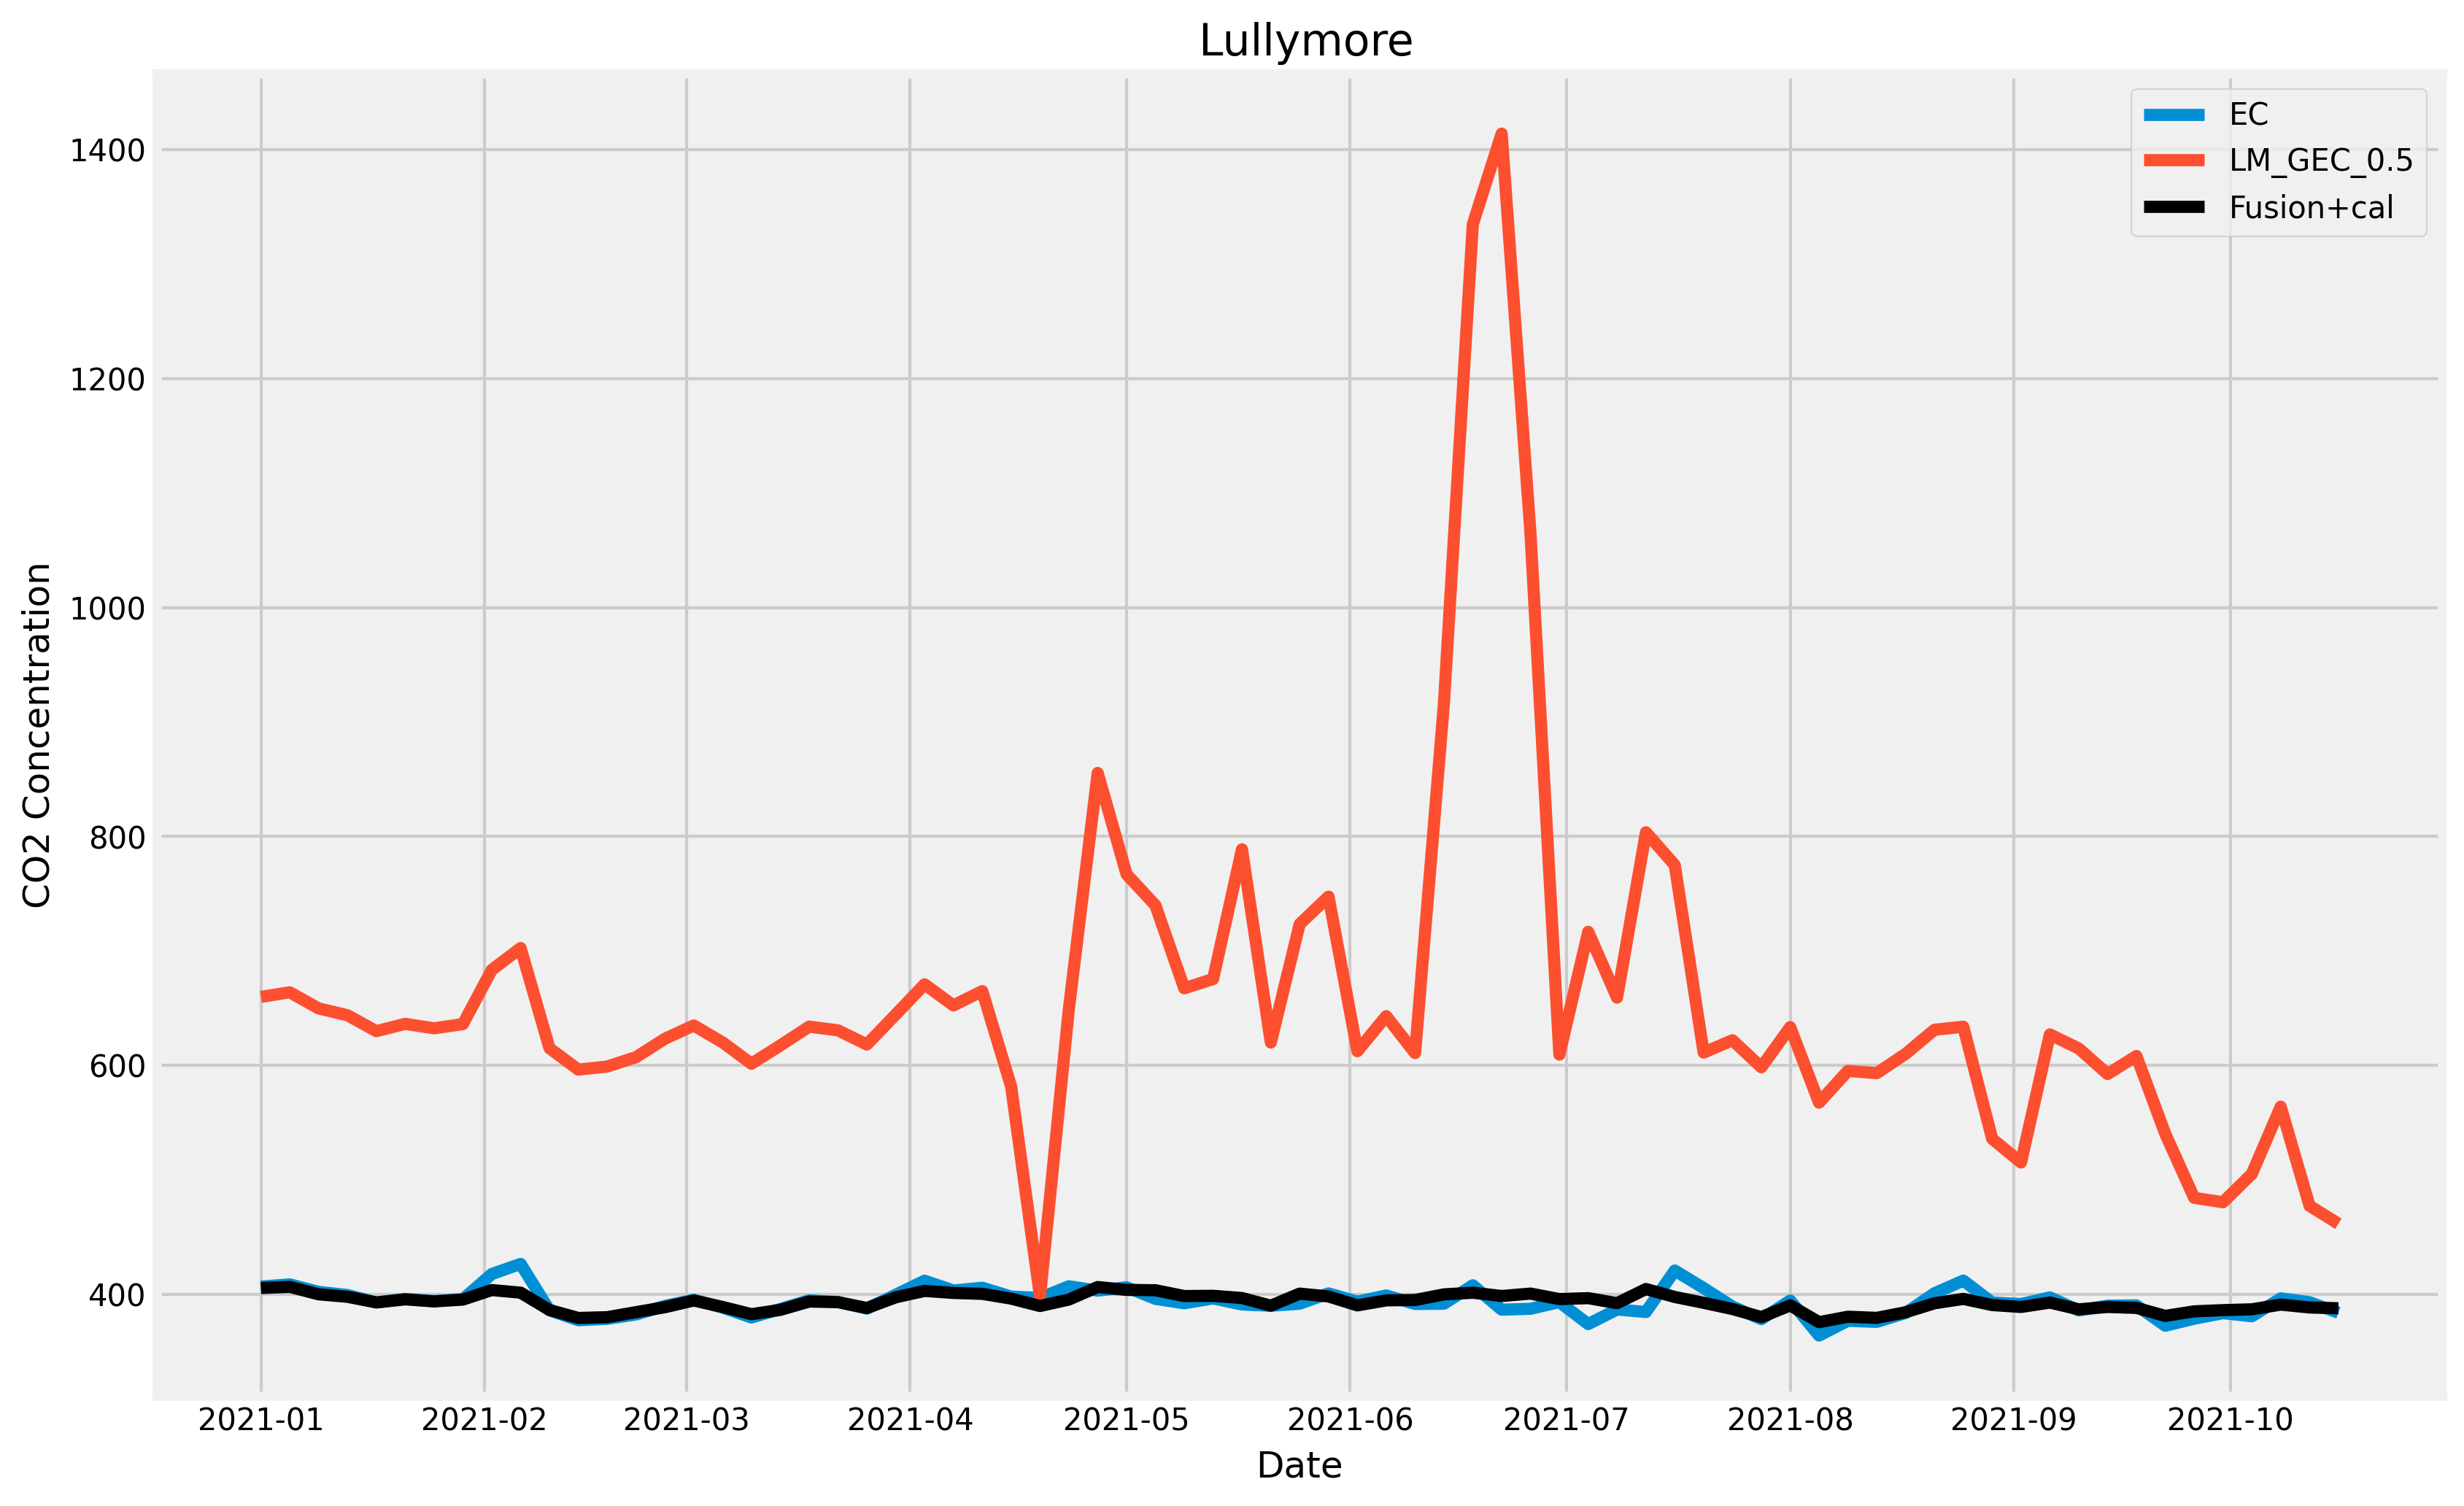

In [62]:
ec_sensors_col=train_set_all_lm[['EC_CO2','1878_CO2Concentration', '1879_CO2Concentration', 'DataFusion']]
plt.figure(figsize=(12,8))
plt.plot(ec_sensors_col['EC_CO2'].resample('4D').mean())

#plt.plot(ec_sensors_col['1826_CO2Concentration'].resample('4D').mean())
#plt.plot(ec_sensors_col['1827_CO2Concentration'].resample('4D').mean())

#plt.plot(ec_sensors_col['1878_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['1879_CO2Concentration'].resample('4D').mean())

#plt.plot(ec_sensors_col['1467_CO2Concentration'].resample('4D').mean())
plt.plot(ec_sensors_col['DataFusion'].resample('4D').mean(), color='black')


plt.legend(['EC', 
           'LM_GEC_0.5','Fusion+cal'], loc='upper right')
plt.title(' Lullymore')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.show()

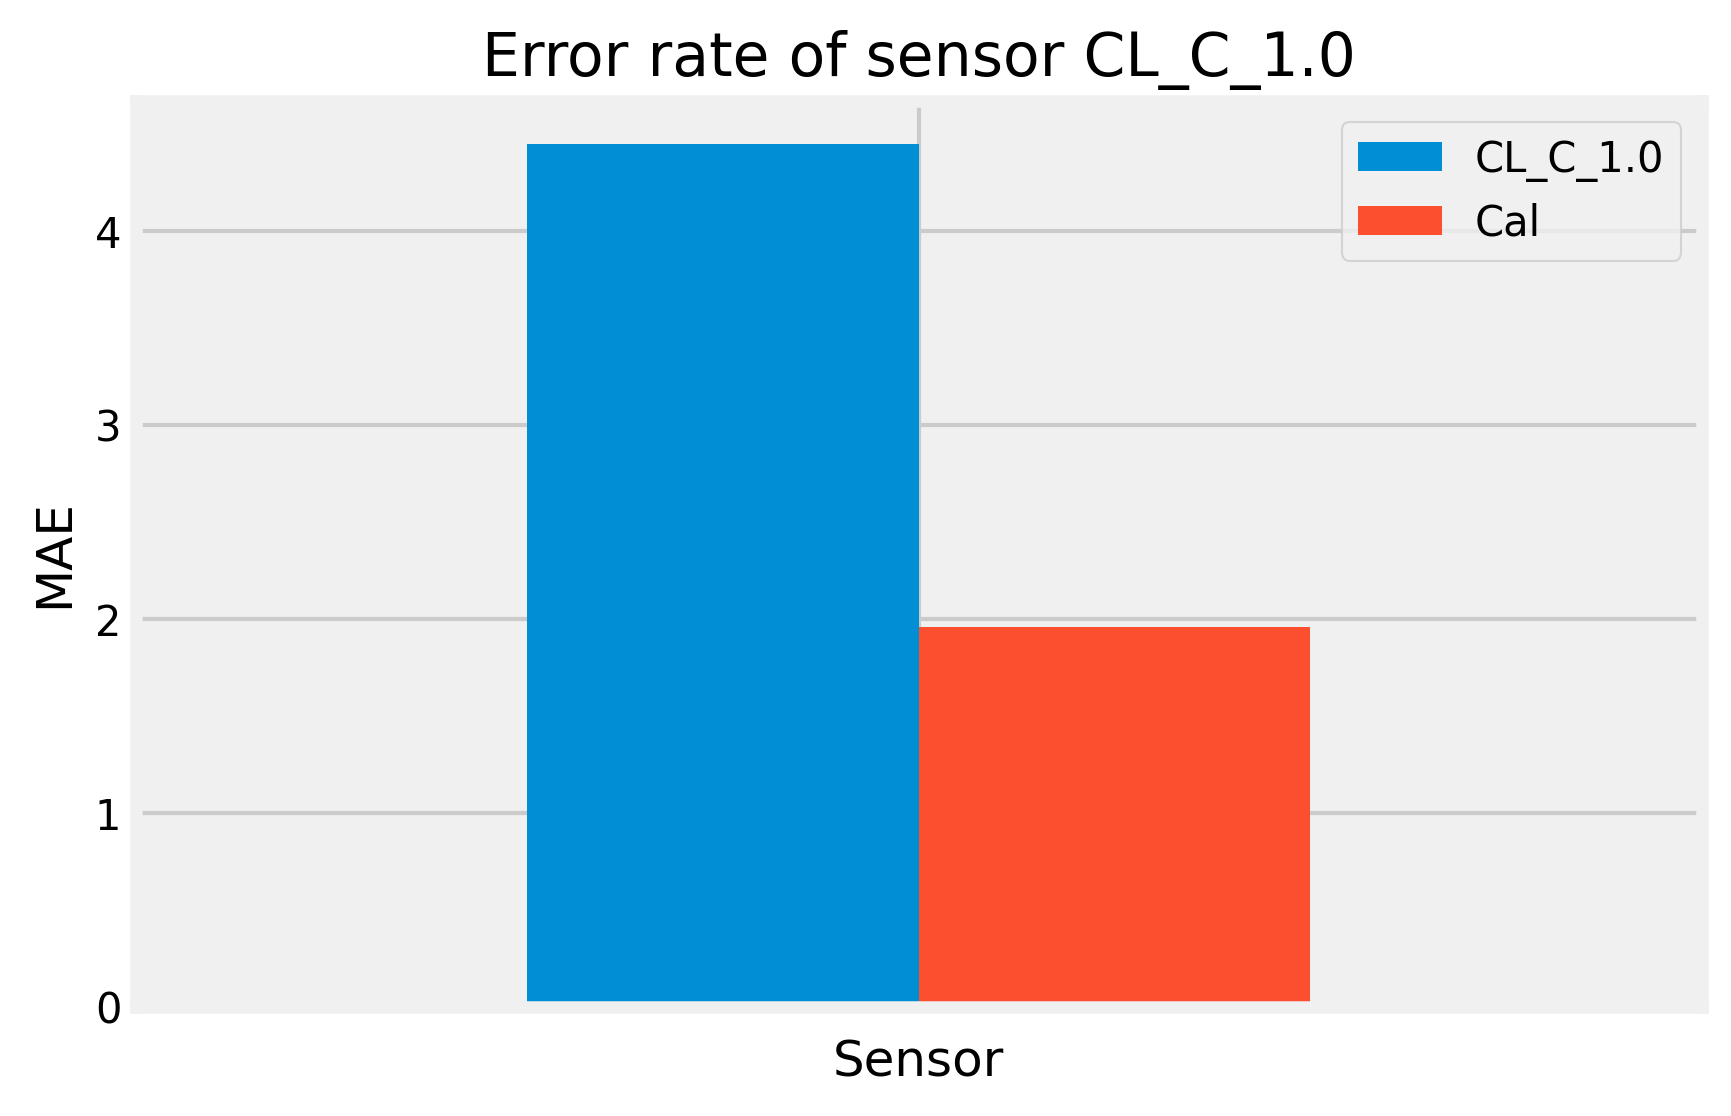

In [9]:
#compare the mean Absolute error between the sensors and ec data
plotdata = pd.DataFrame({
   "CL_C_1.0":[4.45 ],
    "Cal":[1.96],
    
    
    }, 
   index=[""]
)
plotdata.plot(kind="bar")
plt.title("Error rate of sensor CL_C_1.0")
plt.xlabel("Sensor")
plt.ylabel("MAE")
plt.legend(loc='upper right')